### import libraries

In [319]:
import pandas as pd
import numpy as np
import pickle
import scipy
from sklearn.feature_selection import SelectKBest, chi2,  mutual_info_classif
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
  
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import mean_squared_error
from collections import defaultdict as dd
from sklearn.model_selection import StratifiedShuffleSplit

## [ 1 ] Data preparation

### load data

In [4]:
# path to the file

# original csv
recipe_test = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_test.csv'
recipe_train = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_train.csv'

# count vectorizor
train_name_countvectorizer = "C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/train_name_countvectorizer.pkl"
train_steps_countvectorizer = "C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/train_steps_countvectorizer.pkl"
train_ingr_countvectorizer = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/train_ingr_countvectorizer.pkl'

# matrices
train_ingr_vec = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/train_ingr_vec.npz'
train_name_vec = "C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/train_name_vec.npz"
train_steps_vec = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/train_steps_vec.npz'
test_ingr_vec = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/test_ingr_vec.npz'
test_name_vec = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/test_name_vec.npz'
test_steps_vec = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_countvec/recipe_text_features_countvec/test_steps_vec.npz'

# doc2vec50 neural network
train_ingr_doc2vec50 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/recipe_text_features_doc2vec50/train_ingr_doc2vec50.csv'
train_name_doc2vec50 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/recipe_text_features_doc2vec50/train_name_doc2vec50.csv'
train_steps_doc2vec50 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/recipe_text_features_doc2vec50/train_steps_doc2vec50.csv'
test_ingr_doc2vec50 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/recipe_text_features_doc2vec50/test_ingr_doc2vec50.csv'
test_name_doc2vec50 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/recipe_text_features_doc2vec50/test_name_doc2vec50.csv'
test_steps_doc2vec50 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec50/recipe_text_features_doc2vec50/test_steps_doc2vec50.csv'

# doc2vec50 neural network
train_ingr_doc2vec100 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec100/recipe_text_features_doc2vec100/train_ingr_doc2vec100.csv'
train_name_doc2vec100 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec100/recipe_text_features_doc2vec100/train_name_doc2vec100.csv'
train_steps_doc2vec100 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec100/recipe_text_features_doc2vec100/train_steps_doc2vec100.csv'
test_ingr_doc2vec100 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec100/recipe_text_features_doc2vec100/test_ingr_doc2vec100.csv'
test_name_doc2vec100 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec100/recipe_text_features_doc2vec100/test_name_doc2vec100.csv'
test_steps_doc2vec100 = 'C:/Users/taiya/Downloads/MLA2/COMP30027_2021_Project2_datasets/COMP30027_2021_Project2_datasets/recipe_text_features_doc2vec100/recipe_text_features_doc2vec100/test_steps_doc2vec100.csv'

In [5]:
# original csv: name, n_steps, n_ingredients, steps, ingredients, duration_label 
recipe_train_df = pd.read_csv(recipe_train)
recipe_test_df = pd.read_csv(recipe_test)

In [ ]:
# count vectorizor and vocabulary
vocab_train_name = pickle.load(open(train_name_countvectorizer, "rb"))
vocab_train_steps = pickle.load(open(train_steps_countvectorizer, "rb"))
vocab_train_ingr = pickle.load(open(train_ingr_countvectorizer, "rb"))
vocab_dict_train_name = vocab_train_name.vocabulary_
vocab_dict_train_steps = vocab_train_steps.vocabulary_
vocab_dict_train_ingr = vocab_train_ingr.vocabulary_

In [7]:
# sparce matrix
train_name_vec_m = scipy.sparse.load_npz(train_name_vec)
train_ingr_vec_m = scipy.sparse.load_npz(train_ingr_vec)
train_steps_vec_m = scipy.sparse.load_npz(train_steps_vec)
test_name_vec_m = scipy.sparse.load_npz(test_name_vec)
test_ingr_vec_m = scipy.sparse.load_npz(test_ingr_vec)
test_steps_vec_m = scipy.sparse.load_npz(test_steps_vec)

# df
train_name_vec_df = pd.DataFrame(train_name_vec_m.toarray(), columns = vocab_dict_train_name)
train_ingr_vec_df = pd.DataFrame(train_ingr_vec_m.toarray(), columns = vocab_dict_train_ingr)
train_steps_vec_df = pd.DataFrame(train_steps_vec_m.toarray(), columns = vocab_dict_train_steps)
test_name_vec_df = pd.DataFrame(test_name_vec_m.toarray(), columns = vocab_dict_train_name)
test_ingr_vec_df = pd.DataFrame(test_ingr_vec_m.toarray(), columns = vocab_dict_train_ingr)
test_steps_vec_df = pd.DataFrame(test_steps_vec_m.toarray(), columns = vocab_dict_train_steps)

In [8]:
# doc2vec50
train_name_doc2vec50_df = pd.read_csv(train_name_doc2vec50, index_col = False, delimiter = ',', header=None)
train_ingr_doc2vec50_df = pd.read_csv(train_ingr_doc2vec50, index_col = False, delimiter = ',', header=None)
train_steps_doc2vec50_df = pd.read_csv(train_steps_doc2vec50, index_col = False, delimiter = ',', header=None)
test_name_doc2vec50_df = pd.read_csv(test_name_doc2vec50, index_col = False, delimiter = ',', header=None)
test_ingr_doc2vec50_df = pd.read_csv(test_ingr_doc2vec50, index_col = False, delimiter = ',', header=None)
test_steps_doc2vec50_df = pd.read_csv(test_steps_doc2vec50, index_col = False, delimiter = ',', header=None)

In [9]:
# doc2vec100
train_name_doc2vec100_df = pd.read_csv(train_name_doc2vec100, index_col = False, delimiter = ',', header=None)
train_ingr_doc2vec100_df = pd.read_csv(train_ingr_doc2vec100, index_col = False, delimiter = ',', header=None)
train_steps_doc2vec100_df = pd.read_csv(train_steps_doc2vec100, index_col = False, delimiter = ',', header=None)
test_name_doc2vec100_df = pd.read_csv(test_name_doc2vec100, index_col = False, delimiter = ',', header=None)
test_ingr_doc2vec100_df = pd.read_csv(test_ingr_doc2vec100, index_col = False, delimiter = ',', header=None)
test_steps_doc2vec100_df = pd.read_csv(test_steps_doc2vec100, index_col = False, delimiter = ',', header=None)

### data attributes

##### X_n_steps, X_n_ingr, and 3 text features (Bag of Words)

##### \<text features>

doc2vec50: train_name_doc2vec50_df, train_ingr_doc2vec50_df, train_steps_doc2vec50_df, test_name_doc2vec50_df, test_ingr_doc2vec50_df, test_steps_doc2vec50_df 

doc2vec100: train_name_doc2vec100_df, train_ingr_doc2vec100_df, train_steps_doc2vec100_df, test_name_doc2vec100_df, test_ingr_doc2vec100_df, test_steps_doc2vec100_df 

countvectorizor: train_name_vec_df, train_ingr_vec_df, train_steps_vec_df, test_name_vec_df, test_ingr_vec_df, test_steps_vec_df

tf-idf: train_tfidf_name_vec_m, train_tfidf_ingr_vec_m, train_tfidf_steps_vec_m, test_tfidf_name_vec_m, test_tfidf_ingr_vec_m, test_tfidf_steps_vec_m

In [12]:
# 'n_steps'
X_n_steps = pd.DataFrame()
X_n_steps['n_steps'] =  recipe_train_df['n_steps'] 
X_n_steps_m = recipe_train_df['n_steps'].to_numpy()

In [13]:
# 'n_steps'
X_n_steps_test = pd.DataFrame()
X_n_steps_test['n_steps'] =  recipe_test_df['n_steps'] 
X_n_steps_m_test = recipe_test_df['n_steps'].to_numpy()

In [69]:
# 'n_ingredients'
X_n_ingr = pd.DataFrame()
X_n_ingr['n_ingredients'] =  recipe_train_df['n_ingredients']
X_n_ingr_m = recipe_train_df['n_ingredients'].to_numpy()

In [14]:
# 'n_ingredients'
X_n_ingr_test = pd.DataFrame()
X_n_ingr_test['n_ingredients'] =  recipe_test_df['n_ingredients']
X_n_ingr_m_test = recipe_test_df['n_ingredients'].to_numpy()

In [42]:
# label
y_df = recipe_train_df['duration_label'] 
y = y_df.to_numpy()

In [16]:
# index for train test split
X_idx = y_df.index.to_numpy()

In [17]:
# tf-idf
train_tfidf_name_vec_m = TfidfTransformer().fit_transform(train_name_vec_m)
train_tfidf_ingr_vec_m = TfidfTransformer().fit_transform(train_ingr_vec_m)
train_tfidf_steps_vec_m = TfidfTransformer().fit_transform(train_steps_vec_m)
test_tfidf_name_vec_m = TfidfTransformer().fit_transform(test_name_vec_m)
test_tfidf_ingr_vec_m = TfidfTransformer().fit_transform(test_ingr_vec_m)
test_tfidf_steps_vec_m = TfidfTransformer().fit_transform(test_steps_vec_m)

### split data

In [65]:
# split the index of train.csv into train, validation, and test set
# random holdout
X_idx_train_val, X_idx_test, y_train_val, y_test = train_test_split(X_idx, y, test_size=0.2, random_state=88)
#X_idx_train, X_idx_val, y_train, y_val = train_test_split(X_idx_train_val, y_train_val, test_size=0.2, random_state=88)

##### class distribution of the whole dataset from train.csv

In [53]:
# check the distribution of the class label
total = len(y_df)
label_dist = dd(int)

for i in y_df:
    label_dist[i] += 1
    
for k in label_dist.keys():
    label_dist[k] /= total 
label_dist

defaultdict(int, {2.0: 0.50615, 3.0: 0.051225, 1.0: 0.442625})

##### class distribution of train_val

In [66]:
# check the distribution of the class label in train_val
total_trainval = len(y_train_val)
label_dist_trainval = dd(int)

for i in y_train_val:
    label_dist_trainval[i] += 1

for k in label_dist_trainval.keys():
    label_dist_trainval[k] /= total_trainval 
label_dist_trainval

defaultdict(int, {2.0: 0.5051875, 1.0: 0.44325, 3.0: 0.0515625})

## [ 2 ] Feature selection

apply pca, chi, mi, RFE, and forward selection (using sequentialFeatureSelector) to the datasets.

for countvec, reduce each attribtue into column size 50 first then combine all the attribtue to perform the feature selection.

4 datasets to apply feature selection:

(1)countvec + numerial features

(2)countvec with tfidf transformation + numerical feature

(3)doc2vec50 + numerial features

(4)doc2vec100 + numerial features

### split training datasets into train_val and test

In [77]:
#split sparse matrix into train_validation and test set by index
def split_m_by_idx(X_matrix, X_idx_train_val, X_idx_test):
    return [X_matrix[X_idx_train_val, :], X_matrix[X_idx_test, :]]

# split sparse matrix of each attribute in the given list into train_validation and test set by index
# list of matrix for [name, ingr, steps]
# Returns a list of list that contains train, val, and test set for each attribute matrix in m_lst 
# in the form: [[train_val_name, test_name][train_val_ingr, test_ingr][train_val_steps, test_steps]]
def split_att_by_idx(m_lst, X_idx_train_val, X_idx_test):
    data = []
    for X_matrix in m_lst:
        data.append(split_m_by_idx(X_matrix, X_idx_train_val, X_idx_test)) 
    return data

In [78]:
#numerical attributes
X_n_steps_m_data = [X_n_steps_m[X_idx_train_val], X_n_steps_m[X_idx_test]]
X_n_ingr_m_data = [X_n_ingr_m[X_idx_train_val], X_n_ingr_m[X_idx_test]]

#(1)countvec
train_vec_m_data = split_att_by_idx([train_name_vec_m, train_ingr_vec_m, train_steps_vec_m], X_idx_train_val, X_idx_test)

#(2)tfidf
train_tfidf_vec_m_data = split_att_by_idx([train_tfidf_name_vec_m, train_tfidf_ingr_vec_m, train_tfidf_steps_vec_m], X_idx_train_val, X_idx_test)

#(3)doc2vec50
train_doc2vec50_data = split_att_by_idx([train_name_doc2vec50_df.to_numpy(), train_ingr_doc2vec50_df.to_numpy(), train_steps_doc2vec50_df.to_numpy()], X_idx_train_val, X_idx_test)

#(4)doc2vec100
train_doc2vec100_data = split_att_by_idx([train_name_doc2vec100_df.to_numpy(), train_ingr_doc2vec100_df.to_numpy(), train_steps_doc2vec100_df.to_numpy()], X_idx_train_val, X_idx_test)


In [71]:
IDX_NAME = 0
IDX_INGR = 1
IDX_STEPS = 2

### functions for feature selection

In [72]:
# mi
def mi_selection(train_m, val_m, test_m, y_train, k, vocab_train=False):
    
    mi = SelectKBest(mutual_info_classif, k=k)
    
    X_train_mi = mi.fit_transform(train_m, y_train)
    X_val_mi = mi.transform(val_m)
    X_test_mi = mi.transform(test_m)
    
    #print(X_test_mi.shape, X_train_mi.shape)
    train_mi = [scipy.sparse.csr_matrix(X_train_mi), scipy.sparse.csr_matrix(X_val_mi), scipy.sparse.csr_matrix(X_test_mi)]

    if vocab_train:
        # selected text features
        feat_lst = []
        for feat_num in mi.get_support(indices=True):
            feat_lst.append(vocab_train.get_feature_names()[feat_num])
        print(f'mi selected features: {feat_lst}')
        
    return train_mi

In [73]:
# chi
def chi_selection(train_m, val_m, test_m, y_train, k, vocab_train=False):
    
    x2 = SelectKBest(chi2, k=k)

    X_train_x2 = x2.fit_transform(train_m, y_train)
    X_val_x2 = x2.transform(val_m)
    X_test_x2 = x2.transform(test_m)
    
    train_chi = [scipy.sparse.csr_matrix(X_train_x2), scipy.sparse.csr_matrix(X_val_x2), scipy.sparse.csr_matrix(X_test_x2)]

    if vocab_train:
        feat_lst = []
        for feat_num in x2.get_support(indices=True):
            feat_lst.append(vocab_train.get_feature_names()[feat_num])
        print(f'chi selected features: {feat_lst}')
        
    return train_chi

In [74]:
# pca
def pca_selection(train_m, val_m, test_m, k, vocab_train = None):

    if vocab_train != None:
        vocab_train = vocab_train.get_feature_names()
        
    train_df = pd.DataFrame(train_m.toarray(), columns = vocab_train)
    # pca by taking first four principal components
    pca = PCA(n_components=k).fit(train_df)
    X_train_pca = pca.transform(train_df)
    #print(pd.DataFrame(pca.components_,columns=train_df.columns))

    X_val_pca = pca.transform(val_m.toarray())
    X_test_pca = pca.transform(test_m.toarray())
    
    return [scipy.sparse.csr_matrix(X_train_pca), scipy.sparse.csr_matrix(X_val_pca), scipy.sparse.csr_matrix(X_test_pca)]

In [75]:
def firstk_selection(train_m, val_m, test_m, k, vocab_train=False):
    # random k (first k th col)
    if vocab_train:
        print(f'first k selected features: {vocab_train.get_feature_names()[:k]}')
    return [train_m[:, :k], val_m[:, :k], test_m[:, :k]]

#### function for model evaluation

In [98]:
models = [DummyClassifier(strategy='most_frequent'),
          GaussianNB(),
          DecisionTreeClassifier(random_state=0),
          SVC()
         ]
titles = ['Zero-R',
          'GNB',
          'Decision Tree',
          'SVC rbf']

def models_accuracy(combined_data, title, models, y_train, y_val):
    for title, model in zip(titles, models):
        # check accuracy with validation set
        model.fit(combined_data[0].todense(), y_train)
        start = time.time()
        acc = model.score(combined_data[1].todense(), y_val)
        end = time.time()
        t = end - start
        print(title, "\nRandom holdout", 'Time:', t, "\nAccuracy:", acc)
        
        predictions = model.predict((combined_data[1].todense()))
        
        #https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
        print('Micro Precision: {}'.format(precision_score(y_val, predictions, average='micro')))
        print('Micro Recall: {}'.format(recall_score(y_val, predictions, average='micro')))
        print('Micro F1-score: {}\n'.format(f1_score(y_val, predictions, average='micro')))
        
        # print classification report
        print(classification_report(y_val, predictions, zero_division = 0))
        

##### split train_val into train and val

In [79]:
# split the index of train_val to train and val
X_idx_train_val_holdout = np.array(range(len(X_idx_train_val)))
X_idx_train, X_idx_val, y_train, y_val = train_test_split(X_idx_train_val_holdout, y_train_val, test_size=0.2, random_state=88)


In [80]:
# function to split the attribute of train_val to train and val
# returns a list of train val and test
def train_val_split(train_m_data, X_idx_train, X_idx_val, attribute_idx):
    m_train_val = train_m_data[attribute_idx][0]
    m_test = train_m_data[attribute_idx][1]
    m_lst = split_m_by_idx(m_train_val, X_idx_train, X_idx_val)
    m_lst.append(m_test)
    return m_lst


In [83]:
# get train, val, test set for numerical features
X_n_steps_m_train_val_test = [X_n_steps_m_data[0][X_idx_train], X_n_steps_m_data[0][X_idx_val], X_n_steps_m_data[1]]
X_n_ingr_m_train_val_test = [X_n_ingr_m_data[0][X_idx_train], X_n_ingr_m_data[0][X_idx_val], X_n_ingr_m_data[1]]

### 1. perform feature selection on countvec
(1) reduce each text features into 50 using each feture selection method since combining original matrix requires big memory

(2) combine all features including numerical features

(3) perform feature selection to 50 features

In [87]:
# word list
vocab_train_lst = [vocab_train_name, vocab_train_ingr, vocab_train_steps]

In [88]:
train_vec_m_data

[[<32000x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 122150 stored elements in Compressed Sparse Row format>,
  <8000x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 30566 stored elements in Compressed Sparse Row format>],
 [<32000x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 490994 stored elements in Compressed Sparse Row format>,
  <8000x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 123183 stored elements in Compressed Sparse Row format>],
 [<32000x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 1388525 stored elements in Compressed Sparse Row format>,
  <8000x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 349296 stored elements in Compressed Sparse Row format>]]

In [89]:
# split train_val into train and val for each attribute features
# i.e. to get [vec_m_name_train, vec_m_name_val, vec_m_name_test] for each attribute
vec_m_train_val_test = {}
for attribute_idx in [IDX_NAME, IDX_INGR, IDX_STEPS]:
    vec_m_train_val_test[attribute_idx] = train_val_split(train_vec_m_data, X_idx_train, X_idx_val, attribute_idx)

vec_m_train_val_test

{0: [<25600x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 97721 stored elements in Compressed Sparse Row format>,
  <6400x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 24429 stored elements in Compressed Sparse Row format>,
  <8000x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 30566 stored elements in Compressed Sparse Row format>],
 1: [<25600x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 392963 stored elements in Compressed Sparse Row format>,
  <6400x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 98031 stored elements in Compressed Sparse Row format>,
  <8000x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 123183 stored elements in Compressed Sparse Row format>],
 2: [<25600x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 1112165 stored elements in Compressed Sparse Row format>,
  <6400x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 276360 stored elements in Compressed Sparse Row f

#### reduce each feature down to 50

In [90]:
vec_m_train_val_test_mi50 = {}
for idx, attr in vec_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    vec_m_train_val_test_mi50[idx] = mi_selection(train, val, test, y_train, 50, vocab_train=vocab_train_lst[idx])
    

mi selected features: ['apple', 'avocado', 'bake', 'baked', 'bars', 'beef', 'biscotti', 'bread', 'brownies', 'cake', 'casserole', 'cheesecake', 'chicken', 'chili', 'cooked', 'cooker', 'cookies', 'crock', 'crockpot', 'dip', 'dressing', 'lasagna', 'loaf', 'meatloaf', 'microwave', 'pancakes', 'pie', 'pork', 'pot', 'potato', 'potatoes', 'pound', 'pulled', 'pumpkin', 'quiche', 'ribs', 'roast', 'salad', 'salsa', 'sandwich', 'sandwiches', 'sauce', 'slow', 'smoothie', 'soup', 'spread', 'stew', 'stuffed', 'tuna', 'vinaigrette']
mi selected features: ['baking', 'bay', 'beef', 'boneless', 'breadcrumbs', 'broth', 'brown', 'butter', 'cake', 'carrots', 'celery', 'cheddar', 'cheese', 'chicken', 'chuck', 'cinnamon', 'cloves', 'cream', 'cucumber', 'egg', 'eggs', 'flour', 'garlic', 'ground', 'ice', 'lettuce', 'mayonnaise', 'milk', 'oil', 'onion', 'pepper', 'pie', 'pork', 'potatoes', 'powder', 'purpose', 'roast', 'salt', 'sauce', 'soda', 'soup', 'stew', 'stock', 'sugar', 'thyme', 'tomato', 'unsalted', 'v

In [91]:
vec_m_train_val_test_chi50 = {}
for idx, attr in vec_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    vec_m_train_val_test_chi50[idx] = chi_selection(train, val, test, y_train, 50, vocab_train=vocab_train_lst[idx])
    

chi selected features: ['avocado', 'baked', 'beef', 'bread', 'brisket', 'brownies', 'burgundy', 'butt', 'cake', 'casserole', 'chicken', 'chili', 'cooked', 'cooker', 'corned', 'crock', 'crockpot', 'dip', 'dressing', 'frozen', 'ice', 'jerky', 'lasagna', 'meatloaf', 'pancakes', 'pie', 'pork', 'pot', 'potato', 'potatoes', 'pulled', 'quiche', 'ribs', 'roast', 'salad', 'salsa', 'sandwich', 'sauce', 'short', 'shredded', 'slow', 'smoothie', 'soup', 'sourdough', 'spread', 'steak', 'stew', 'stock', 'stuffed', 'vinaigrette']
chi selected features: ['baking', 'bay', 'beef', 'boneless', 'breadcrumbs', 'brisket', 'broth', 'brown', 'butter', 'carrots', 'celery', 'cheddar', 'cheese', 'chicken', 'chuck', 'cinnamon', 'cloves', 'cream', 'diced', 'dried', 'egg', 'eggs', 'flour', 'ground', 'ice', 'lettuce', 'mayonnaise', 'meat', 'milk', 'onion', 'pie', 'pork', 'potatoes', 'powder', 'purpose', 'ribs', 'roast', 'salt', 'sauce', 'shoulder', 'soda', 'soup', 'stew', 'stewing', 'sugar', 'thyme', 'tomato', 'unsal

In [92]:
vec_m_train_val_test_pca50 = {}
for idx, attr in vec_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    vec_m_train_val_test_pca50[idx] = pca_selection(train, val, test, 50, vocab_train_lst[idx])
    

In [93]:
vec_m_train_val_test_first50 = {}
for idx, attr in vec_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    vec_m_train_val_test_first50[idx] = firstk_selection(train, val, test, 50, vocab_train_lst[idx])
    

first k selected features: ['00', '000', '007', '00pm', '07', '09', '10', '100', '1000', '1001', '101', '107476', '11', '118cals', '12', '13', '14', '15', '16', '16463', '17', '1774', '18', '1870', '1886', '1900', '1908', '1927', '1937', '1940', '1948', '1949', '1950', '1950s', '1951', '1953', '1954', '1960', '1962', '1964', '1965', '1968', '1971', '1972', '1977', '1980', '1981', '1982', '1991', '1993']
first k selected features: ['10', '100', '10x', '12', '15', '151', '18', '35', '43', '57', '80', '85', '90', '93', '94', '95', '98', 'abalone', 'absolut', 'aburage', 'accent', 'achiote', 'acid', 'acini', 'acorn', 'acting', 'active', 'added', 'adobo', 'adolph', 'advocaat', 'adzuki', 'agar', 'agave', 'aged', 'ahi', 'aid', 'aioli', 'aji', 'ajinomoto', 'ajmoh', 'ajvar', 'ajwain', 'al', 'alarm', 'albacore', 'alcohol', 'alcoholic', 'ale', 'aleppo']
first k selected features: ['00', '000', '001', '0016', '01', '02', '05', '07', '0g', '0mg', '10', '100', '1000', '1000s', '100c', '100f', '100g',

#### combine the reduced features (3 x 50) and numerical features 
#### select 50 features from the combined feature set

In [94]:
# mi
# combine all features
#numerical features
train_mi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_mi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_mi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in vec_m_train_val_test_mi50.values():
    # add train
    train_mi = scipy.sparse.hstack([train_mi, attr[0]])
    # add val
    val_mi = scipy.sparse.hstack([val_mi, attr[1]])
    # add test
    test_mi = scipy.sparse.hstack([test_mi, attr[2]])

In [96]:
# perform feature selection on combined datasets, reduce to 50
mi_combined_data = mi_selection(train_mi, val_mi, test_mi, y_train, 50, vocab_train=False)
mi_combined_data

[<25600x50 sparse matrix of type '<class 'numpy.int64'>'
 	with 285420 stored elements in Compressed Sparse Row format>,
 <6400x50 sparse matrix of type '<class 'numpy.int64'>'
 	with 70632 stored elements in Compressed Sparse Row format>,
 <8000x50 sparse matrix of type '<class 'numpy.int64'>'
 	with 89448 stored elements in Compressed Sparse Row format>]

In [ ]:
'''
# test different feature size
mi_combined_datasets = []
for num_features in range(10, 160, 20):
    mi_combined_datasets.append(mi_selection(train_mi, val_mi, test_mi, y_train, num_features, vocab_train=False))
mi_combined_datasets
'''

#### accuracy of each model trained with 50 features

In [99]:
# check accuracy with validation set with 50 features
models_accuracy(mi_combined_data, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.004602193832397461 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.01399993896484375 
Accuracy: 0.71640625
Micro Precision: 0.71640625
Micro Recall: 0.71640625
Micro F1-score: 0.7164062500000001

              precision    recall  f1-score   support

         1.0       0.65      0.89      0.75      2906
         2.0       0.85      0.58      0.69      3189
         3.0       0.58      0.53      0.55       305

    accuracy                           0.72      6400
   macro avg       0.69      0.67    

#### accuracy and f score of each model with differnet feature size

In [117]:
'''feature_size = list(range(10, 160, 20))'''

[10, 30, 50, 70, 90, 110, 130, 150]

In [116]:
'''
# num features vs accuracy for mi selected feature from countvec
f_vs_featuresize_svc = []
for data in mi_combined_datasets:
    # check accuracy with validation set
    model = svm.SVC()
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc_mi = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    f_vs_featuresize_svc.append(f1_score(y_val, y_pred, average='micro'))
    print("SVC rbf", "Random holdout Accuracy:", acc_mi, 'Time:', t)
    '''

SVC rbf Random holdout Accuracy: 0.72765625 Time: 2.6080105304718018
SVC rbf Random holdout Accuracy: 0.770625 Time: 4.852594375610352
SVC rbf Random holdout Accuracy: 0.7796875 Time: 8.967099666595459
SVC rbf Random holdout Accuracy: 0.78796875 Time: 14.221636772155762
SVC rbf Random holdout Accuracy: 0.79 Time: 15.78308629989624
SVC rbf Random holdout Accuracy: 0.79046875 Time: 12.674903869628906
SVC rbf Random holdout Accuracy: 0.7928125 Time: 12.422618389129639
SVC rbf Random holdout Accuracy: 0.7921875 Time: 17.121973037719727


In [118]:
'''
# test different feature size
mi_combined_datasets2 = []
for num_features in range(110, 160, 10):
    mi_combined_datasets2.append(mi_selection(train_mi, val_mi, test_mi, y_train, num_features, vocab_train=False))

# num features vs accuracy for mi selected feature from countvec
f_vs_featuresize_svc2 = []
for data in mi_combined_datasets2:
    # check accuracy with validation set
    model = svm.SVC()
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc_mi = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    f_vs_featuresize_svc2.append(f1_score(y_val, y_pred, average='micro'))
    print("SVC rbf", "Random holdout Accuracy:", acc_mi, 'Time:', t)
'''

SVC rbf Random holdout Accuracy: 0.79046875 Time: 14.626805305480957
SVC rbf Random holdout Accuracy: 0.79203125 Time: 12.112060308456421
SVC rbf Random holdout Accuracy: 0.7928125 Time: 13.084296464920044
SVC rbf Random holdout Accuracy: 0.79359375 Time: 13.548938035964966
SVC rbf Random holdout Accuracy: 0.7921875 Time: 13.276650667190552


In [108]:
'''
# num features vs accuracy for mi selected feature from countvec
f_vs_featuresize_0R = []
for data in mi_combined_datasets:
    # check accuracy with validation set
    model = DummyClassifier(strategy='most_frequent')
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc_mi = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    f_vs_featuresize_0R.append(f1_score(y_val, y_pred, average='micro'))
    print("0R", "Random holdout Accuracy:", acc_mi, 'Time:', t)
    '''

0R Random holdout Accuracy: 0.49828125 Time: 0.002031564712524414
0R Random holdout Accuracy: 0.49828125 Time: 0.002001047134399414
0R Random holdout Accuracy: 0.49828125 Time: 0.002000093460083008
0R Random holdout Accuracy: 0.49828125 Time: 0.0029990673065185547
0R Random holdout Accuracy: 0.49828125 Time: 0.002999544143676758
0R Random holdout Accuracy: 0.49828125 Time: 0.001999378204345703
0R Random holdout Accuracy: 0.49828125 Time: 0.0029985904693603516
0R Random holdout Accuracy: 0.49828125 Time: 0.0029990673065185547


In [115]:
'''# num features vs accuracy for mi selected feature from countvec
f_vs_featuresize_gnb = []
for data in mi_combined_datasets:
    # check accuracy with validation set
    model = GaussianNB()
    model.fit(data[0].todense(), y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc_mi = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    f_vs_featuresize_gnb.append(f1_score(y_val, y_pred, average='micro'))
    print("Gaussian NB", "Random holdout Accuracy:", acc_mi, 'Time:', t)'''

Gaussian NB Random holdout Accuracy: 0.698125 Time: 0.002992391586303711
Gaussian NB Random holdout Accuracy: 0.713125 Time: 0.009014368057250977
Gaussian NB Random holdout Accuracy: 0.71640625 Time: 0.014000892639160156
Gaussian NB Random holdout Accuracy: 0.7159375 Time: 0.018000125885009766
Gaussian NB Random holdout Accuracy: 0.71484375 Time: 0.021996736526489258
Gaussian NB Random holdout Accuracy: 0.71703125 Time: 0.026001691818237305
Gaussian NB Random holdout Accuracy: 0.7075 Time: 0.03500056266784668
Gaussian NB Random holdout Accuracy: 0.6528125 Time: 0.044988393783569336


In [114]:
'''# num features vs accuracy for mi selected feature from countvec
f_vs_featuresize_dt = []
for data in mi_combined_datasets:
    # check accuracy with validation set
    model = DecisionTreeClassifier(random_state=0)
    model.fit(data[0].todense(), y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc_mi = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    f_vs_featuresize_dt.append(f1_score(y_val, y_pred, average='micro'))
    print("dt", "Random holdout Accuracy:", acc_mi, 'Time:', t)'''

dt Random holdout Accuracy: 0.6746875 Time: 0.0030014514923095703
dt Random holdout Accuracy: 0.71890625 Time: 0.0037565231323242188
dt Random holdout Accuracy: 0.7065625 Time: 0.0039997100830078125
dt Random holdout Accuracy: 0.7059375 Time: 0.003996610641479492
dt Random holdout Accuracy: 0.70828125 Time: 0.005976676940917969
dt Random holdout Accuracy: 0.704375 Time: 0.006028175354003906
dt Random holdout Accuracy: 0.70734375 Time: 0.005979776382446289
dt Random holdout Accuracy: 0.71390625 Time: 0.00802302360534668


In [130]:
'''f_vs_featuresize_svc2 # 140 gives the highest fscore'''

[0.7904687499999999, 0.79203125, 0.7928125, 0.79359375, 0.7921875]

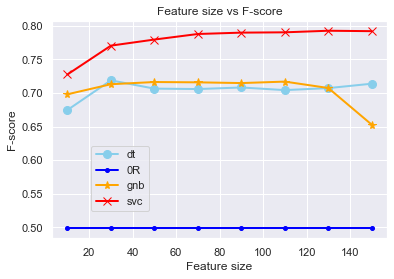

In [135]:
'''# number of feature vs f-score
        
data = {'dt':f_vs_featuresize_dt,
        '0R':f_vs_featuresize_0R,
        'gnb':f_vs_featuresize_gnb,
        'svc':f_vs_featuresize_svc,
        'size': feature_size
       }

f1_df = pd.DataFrame(data)
# multiple line plots
plt.plot('size', 'dt', data=f1_df, marker='o', markersize=8, color='skyblue', linewidth=2)
plt.plot('size', '0R', data=f1_df, marker='.', markersize=8, color='blue', linewidth=2)
plt.plot('size', 'gnb', data=f1_df, marker='*', markersize=8, color='orange', linewidth=2)
plt.plot('size', 'svc', data=f1_df, marker='x', markersize=8, color='red', linewidth=2)

plt.title("Feature size vs F-score")
plt.xlabel('Feature size')
plt.ylabel('F-score')
plt.legend(bbox_to_anchor=(0.1, 0.1, 0, 0))

# show graph
plt.show()'''

In [137]:
# chi
# combine all features
#numerical features
train_chi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_chi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_chi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in vec_m_train_val_test_chi50.values():
    # add train
    train_chi = scipy.sparse.hstack([train_chi, attr[0]])
    # add val
    val_chi = scipy.sparse.hstack([val_chi, attr[1]])
    # add test
    test_chi = scipy.sparse.hstack([test_chi, attr[2]])

# perform feature selection on combined datasets
chi_combined_data = chi_selection(train_chi, val_chi, test_chi, y_train, 50, vocab_train=False)


In [139]:
# check accuracy with validation set with 50 features
models_accuracy(chi_combined_data, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.002618074417114258 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.013993978500366211 
Accuracy: 0.71125
Micro Precision: 0.71125
Micro Recall: 0.71125
Micro F1-score: 0.7112499999999999

              precision    recall  f1-score   support

         1.0       0.65      0.90      0.75      2906
         2.0       0.86      0.55      0.67      3189
         3.0       0.58      0.60      0.59       305

    accuracy                           0.71      6400
   macro avg       0.69      0.68      0.67  

In [140]:
# pca
# combine all features
#numerical features
train_pca = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_pca = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_pca = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in vec_m_train_val_test_pca50.values():
    # add train
    train_pca = scipy.sparse.hstack([train_pca, attr[0]])
    # add val
    val_pca = scipy.sparse.hstack([val_pca, attr[1]])
    # add test
    test_pca = scipy.sparse.hstack([test_pca, attr[2]])

# perform feature selection on combined datasets
pca_combined_data = pca_selection(train_pca, val_pca, test_pca, 50)


In [141]:
# check accuracy with validation set with 50 features
models_accuracy(pca_combined_data, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.0035326480865478516 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.01403355598449707 
Accuracy: 0.64046875
Micro Precision: 0.64046875
Micro Recall: 0.64046875
Micro F1-score: 0.64046875

              precision    recall  f1-score   support

         1.0       0.59      0.78      0.67      2906
         2.0       0.72      0.55      0.62      3189
         3.0       0.62      0.25      0.36       305

    accuracy                           0.64      6400
   macro avg       0.64      0.53      0.55 

In [142]:
# first50
# combine all features
#numerical features
train_k = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_k = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_k = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in vec_m_train_val_test_mi50.values():
    # add train
    train_k = scipy.sparse.hstack([train_k, attr[0]])
    # add val
    val_k = scipy.sparse.hstack([val_k, attr[1]])
    # add test
    test_k = scipy.sparse.hstack([test_k, attr[2]])

# perform feature selection on combined datasets
k_combined_data = firstk_selection(train_k.tocsr(), val_k.tocsr(), test_k.tocsr(), 50, vocab_train=False)

In [143]:
# check accuracy with validation set with 50 features
models_accuracy(k_combined_data, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.0020325183868408203 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.01402902603149414 
Accuracy: 0.27546875
Micro Precision: 0.27546875
Micro Recall: 0.27546875
Micro F1-score: 0.27546875

              precision    recall  f1-score   support

         1.0       0.71      0.26      0.38      2906
         2.0       0.81      0.24      0.37      3189
         3.0       0.06      0.87      0.11       305

    accuracy                           0.28      6400
   macro avg       0.53      0.45      0.28 

#### feature size vs f score

In [144]:
# test different feature size
chi_combined_datasets = []
for num_features in range(10, 160, 20):
    chi_combined_datasets.append(chi_selection(train_mi, val_mi, test_mi, y_train, num_features, vocab_train=False))
chi_combined_datasets

[[<25600x10 sparse matrix of type '<class 'numpy.int64'>'
  	with 82761 stored elements in Compressed Sparse Row format>,
  <6400x10 sparse matrix of type '<class 'numpy.int64'>'
  	with 20581 stored elements in Compressed Sparse Row format>,
  <8000x10 sparse matrix of type '<class 'numpy.int64'>'
  	with 25901 stored elements in Compressed Sparse Row format>],
 [<25600x30 sparse matrix of type '<class 'numpy.int64'>'
  	with 174666 stored elements in Compressed Sparse Row format>,
  <6400x30 sparse matrix of type '<class 'numpy.int64'>'
  	with 43145 stored elements in Compressed Sparse Row format>,
  <8000x30 sparse matrix of type '<class 'numpy.int64'>'
  	with 54580 stored elements in Compressed Sparse Row format>],
 [<25600x50 sparse matrix of type '<class 'numpy.int64'>'
  	with 248455 stored elements in Compressed Sparse Row format>,
  <6400x50 sparse matrix of type '<class 'numpy.int64'>'
  	with 61501 stored elements in Compressed Sparse Row format>,
  <8000x50 sparse matrix 

In [ ]:
feature_size = list(range(10, 160, 20))

In [275]:
# num features vs accuracy for mi selected feature from countvec
tchi_f_vs_featuresize_svc = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = svm.SVC()
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[0].todense()))
    acc = accuracy_score(y_train, y_pred)
    end = time.time()
    t = end - start
    tchi_f_vs_featuresize_svc.append(f1_score(y_train, y_pred, average='micro'))
    print("SVC rbf", "Random holdout Accuracy:", acc, 'Time:', t)
    
# test different feature size
tchi_combined_datasets2 = []
for num_features in range(110, 160, 10):
    tchi_combined_datasets2.append(chi_selection(train_chi, val_chi, test_chi, y_train, num_features, vocab_train=False))

# num features vs accuracy for mi selected feature from countvec
tchi_f_vs_featuresize_svc2 = []
for data in chi_combined_datasets2:
    # check accuracy with validation set
    model = svm.SVC()
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[0].todense()))
    acc = accuracy_score(y_train, y_pred)
    end = time.time()
    t = end - start
    tchi_f_vs_featuresize_svc2.append(f1_score(y_train, y_pred, average='micro'))
    print("SVC rbf", "Random holdout Accuracy:", acc, 'Time:', t)
    
# num features vs accuracy for mi selected feature from countvec
tchi_f_vs_featuresize_0R = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = DummyClassifier(strategy='most_frequent')
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[0].todense()))
    acc = accuracy_score(y_train, y_pred)
    end = time.time()
    t = end - start
    tchi_f_vs_featuresize_0R.append(f1_score(y_train, y_pred, average='micro'))
    print("0R", "Random holdout Accuracy:", acc, 'Time:', t)
    
# num features vs accuracy for mi selected feature from countvec
tchi_f_vs_featuresize_gnb = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = GaussianNB()
    model.fit(data[0].todense(), y_train)
    start = time.time()
    y_pred = model.predict((data[0].todense()))
    acc = accuracy_score(y_train, y_pred)
    end = time.time()
    t = end - start
    tchi_f_vs_featuresize_gnb.append(f1_score(y_train, y_pred, average='micro'))
    print("Gaussian NB", "Random holdout Accuracy:", acc, 'Time:', t)
    
# num features vs accuracy for mi selected feature from countvec
tchi_f_vs_featuresize_dt = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = DecisionTreeClassifier(random_state=0)
    model.fit(data[0].todense(), y_train)
    start = time.time()
    y_pred = model.predict((data[0].todense()))
    acc = accuracy_score(y_train, y_pred)
    end = time.time()
    t = end - start
    tchi_f_vs_featuresize_dt.append(f1_score(y_train, y_pred, average='micro'))
    print("dt", "Random holdout Accuracy:", acc, 'Time:', t)
    


SVC rbf Random holdout Accuracy: 0.7256640625 Time: 11.251056909561157
SVC rbf Random holdout Accuracy: 0.755703125 Time: 19.72305464744568
SVC rbf Random holdout Accuracy: 0.78984375 Time: 27.759153842926025
SVC rbf Random holdout Accuracy: 0.7961328125 Time: 37.15301489830017
SVC rbf Random holdout Accuracy: 0.8003125 Time: 39.313815116882324
SVC rbf Random holdout Accuracy: 0.8009375 Time: 42.42737364768982
SVC rbf Random holdout Accuracy: 0.8024609375 Time: 48.35496544837952
SVC rbf Random holdout Accuracy: 0.8033984375 Time: 48.14439868927002
SVC rbf Random holdout Accuracy: 0.7988671875 Time: 45.82429075241089
SVC rbf Random holdout Accuracy: 0.7995703125 Time: 43.56066155433655
SVC rbf Random holdout Accuracy: 0.80046875 Time: 72.9695737361908
SVC rbf Random holdout Accuracy: 0.80046875 Time: 49.12831950187683
SVC rbf Random holdout Accuracy: 0.800859375 Time: 56.77725648880005
0R Random holdout Accuracy: 0.5069140625 Time: 0.002986431121826172
0R Random holdout Accuracy: 0.5069

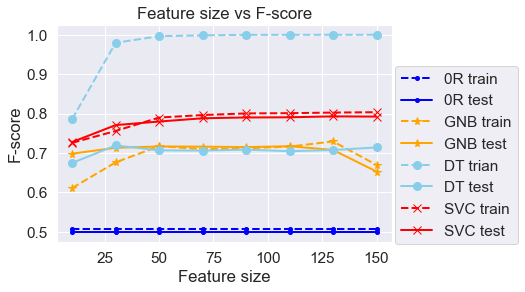

In [294]:
# train and test f score
# number of feature vs f-score
        
data = {'dt':tchi_f_vs_featuresize_dt,
        '0R':tchi_f_vs_featuresize_0R,
        'gnb':tchi_f_vs_featuresize_gnb,
        'svc':tchi_f_vs_featuresize_svc,
        'size': feature_size
       }

tf1_df = pd.DataFrame(data)
# multiple line plots

plt.plot('size', '0R', data=tf1_df, marker='.', linestyle='--', markersize=8, color='blue', linewidth=2)
plt.plot('size', '0R', data=f1_df, marker='.', markersize=8, color='blue', linewidth=2)
plt.plot('size', 'gnb', data=tf1_df, marker='*', linestyle='--', markersize=8, color='orange', linewidth=2)
plt.plot('size', 'gnb', data=f1_df, marker='*', markersize=8, color='orange', linewidth=2)
plt.plot('size', 'dt', data=tf1_df, marker='o', linestyle='--', markersize=8, color='skyblue', linewidth=2)
plt.plot('size', 'dt', data=f1_df, marker='o', markersize=8, color='skyblue', linewidth=2)
plt.plot('size', 'svc', data=tf1_df, marker='x', linestyle='--', markersize=8, color='red', linewidth=2)
plt.plot('size', 'svc', data=f1_df, marker='x', markersize=8, color='red', linewidth=2)


plt.title("Feature size vs F-score")
plt.xlabel('Feature size')
plt.ylabel('F-score')
plt.legend(loc='right', bbox_to_anchor=(1.4, 0.4, 0, 0), labels = ['0R train', '0R test', 'GNB train', "GNB test", "DT trian", "DT test", "SVC train", "SVC test"])


# show graph
plt.show()

In [145]:
# num features vs accuracy for mi selected feature from countvec
chi_f_vs_featuresize_svc = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = svm.SVC()
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    chi_f_vs_featuresize_svc.append(f1_score(y_val, y_pred, average='micro'))
    print("SVC rbf", "Random holdout Accuracy:", acc, 'Time:', t)

SVC rbf Random holdout Accuracy: 0.72109375 Time: 3.9829959869384766
SVC rbf Random holdout Accuracy: 0.75015625 Time: 5.114340782165527
SVC rbf Random holdout Accuracy: 0.7846875 Time: 10.277445077896118
SVC rbf Random holdout Accuracy: 0.78859375 Time: 11.646394968032837
SVC rbf Random holdout Accuracy: 0.78984375 Time: 10.699040651321411
SVC rbf Random holdout Accuracy: 0.7921875 Time: 17.15875506401062
SVC rbf Random holdout Accuracy: 0.79234375 Time: 18.832597255706787
SVC rbf Random holdout Accuracy: 0.79234375 Time: 14.683464765548706


In [146]:
# test different feature size
chi_combined_datasets2 = []
for num_features in range(110, 160, 10):
    chi_combined_datasets2.append(chi_selection(train_chi, val_chi, test_chi, y_train, num_features, vocab_train=False))

# num features vs accuracy for mi selected feature from countvec
chi_f_vs_featuresize_svc2 = []
for data in chi_combined_datasets2:
    # check accuracy with validation set
    model = svm.SVC()
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    chi_f_vs_featuresize_svc2.append(f1_score(y_val, y_pred, average='micro'))
    print("SVC rbf", "Random holdout Accuracy:", acc, 'Time:', t)

SVC rbf Random holdout Accuracy: 0.79109375 Time: 18.99173641204834
SVC rbf Random holdout Accuracy: 0.7915625 Time: 21.40047025680542
SVC rbf Random holdout Accuracy: 0.79140625 Time: 19.262833833694458
SVC rbf Random holdout Accuracy: 0.7915625 Time: 15.567504167556763
SVC rbf Random holdout Accuracy: 0.79046875 Time: 15.198889255523682


In [147]:
# num features vs accuracy for mi selected feature from countvec
chi_f_vs_featuresize_0R = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = DummyClassifier(strategy='most_frequent')
    model.fit(data[0], y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    chi_f_vs_featuresize_0R.append(f1_score(y_val, y_pred, average='micro'))
    print("0R", "Random holdout Accuracy:", acc, 'Time:', t)

0R Random holdout Accuracy: 0.49828125 Time: 0.0018320083618164062
0R Random holdout Accuracy: 0.49828125 Time: 0.0029981136322021484
0R Random holdout Accuracy: 0.49828125 Time: 0.0020012855529785156
0R Random holdout Accuracy: 0.49828125 Time: 0.002010822296142578
0R Random holdout Accuracy: 0.49828125 Time: 0.0019991397857666016
0R Random holdout Accuracy: 0.49828125 Time: 0.004003286361694336
0R Random holdout Accuracy: 0.49828125 Time: 0.0039997100830078125
0R Random holdout Accuracy: 0.49828125 Time: 0.004999876022338867


In [148]:
# num features vs accuracy for mi selected feature from countvec
chi_f_vs_featuresize_gnb = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = GaussianNB()
    model.fit(data[0].todense(), y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    chi_f_vs_featuresize_gnb.append(f1_score(y_val, y_pred, average='micro'))
    print("Gaussian NB", "Random holdout Accuracy:", acc, 'Time:', t)

Gaussian NB Random holdout Accuracy: 0.62203125 Time: 0.004997730255126953
Gaussian NB Random holdout Accuracy: 0.68328125 Time: 0.013003110885620117
Gaussian NB Random holdout Accuracy: 0.72375 Time: 0.020000219345092773
Gaussian NB Random holdout Accuracy: 0.70984375 Time: 0.02199530601501465
Gaussian NB Random holdout Accuracy: 0.7140625 Time: 0.023002147674560547
Gaussian NB Random holdout Accuracy: 0.71859375 Time: 0.030025005340576172
Gaussian NB Random holdout Accuracy: 0.726875 Time: 0.04196810722351074
Gaussian NB Random holdout Accuracy: 0.6659375 Time: 0.0440068244934082


In [149]:
# num features vs accuracy for mi selected feature from countvec
chi_f_vs_featuresize_dt = []
for data in chi_combined_datasets:
    # check accuracy with validation set
    model = DecisionTreeClassifier(random_state=0)
    model.fit(data[0].todense(), y_train)
    start = time.time()
    y_pred = model.predict((data[1].todense()))
    acc = accuracy_score(y_val, y_pred)
    end = time.time()
    t = end - start
    chi_f_vs_featuresize_dt.append(f1_score(y_val, y_pred, average='micro'))
    print("dt", "Random holdout Accuracy:", acc, 'Time:', t)

dt Random holdout Accuracy: 0.689375 Time: 0.0029993057250976562
dt Random holdout Accuracy: 0.6725 Time: 0.005011320114135742
dt Random holdout Accuracy: 0.70484375 Time: 0.007996797561645508
dt Random holdout Accuracy: 0.70328125 Time: 0.0039975643157958984
dt Random holdout Accuracy: 0.7040625 Time: 0.004986763000488281
dt Random holdout Accuracy: 0.70828125 Time: 0.005001544952392578
dt Random holdout Accuracy: 0.709375 Time: 0.0059909820556640625
dt Random holdout Accuracy: 0.71375 Time: 0.009001731872558594


In [150]:
chi_f_vs_featuresize_svc2 # 120, 140 gives the highest fscore

[0.79109375, 0.7915625, 0.7914062499999999, 0.7915625, 0.7904687499999999]

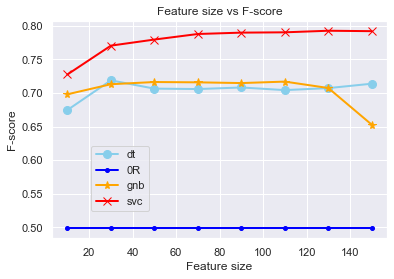

In [151]:
# number of feature vs f-score
        
data = {'dt':f_vs_featuresize_dt,
        '0R':f_vs_featuresize_0R,
        'gnb':f_vs_featuresize_gnb,
        'svc':f_vs_featuresize_svc,
        'size': feature_size
       }

f1_df = pd.DataFrame(data)
# multiple line plots
plt.plot('size', 'dt', data=f1_df, marker='o', markersize=8, color='skyblue', linewidth=2)
plt.plot('size', '0R', data=f1_df, marker='.', markersize=8, color='blue', linewidth=2)
plt.plot('size', 'gnb', data=f1_df, marker='*', markersize=8, color='orange', linewidth=2)
plt.plot('size', 'svc', data=f1_df, marker='x', markersize=8, color='red', linewidth=2)

plt.title("Feature size vs F-score")
plt.xlabel('Feature size')
plt.ylabel('F-score')
plt.legend(bbox_to_anchor=(0.1, 0.1, 0, 0))

# show graph
plt.show()

### 2. perform feature selection on countvec + tfidf
(1) reduce each text features into 50 using each feture selection method since combining original matrix requires big memory

(2) combine all features including numerical features

(3) perform feature selection to 50 features

In [152]:
train_tfidf_vec_m_data

[[<32000x10892 sparse matrix of type '<class 'numpy.float64'>'
  	with 122150 stored elements in Compressed Sparse Row format>,
  <8000x10892 sparse matrix of type '<class 'numpy.float64'>'
  	with 30566 stored elements in Compressed Sparse Row format>],
 [<32000x2906 sparse matrix of type '<class 'numpy.float64'>'
  	with 490994 stored elements in Compressed Sparse Row format>,
  <8000x2906 sparse matrix of type '<class 'numpy.float64'>'
  	with 123183 stored elements in Compressed Sparse Row format>],
 [<32000x17967 sparse matrix of type '<class 'numpy.float64'>'
  	with 1388525 stored elements in Compressed Sparse Row format>,
  <8000x17967 sparse matrix of type '<class 'numpy.float64'>'
  	with 349296 stored elements in Compressed Sparse Row format>]]

In [153]:
# split train_val into train and val for each attribute features
# i.e. to get [vec_m_name_train, vec_m_name_val, vec_m_name_test] for each attribute
tfidf_m_train_val_test = {}
for attribute_idx in [IDX_NAME, IDX_INGR, IDX_STEPS]:
    tfidf_m_train_val_test[attribute_idx] = train_val_split(train_tfidf_vec_m_data, X_idx_train, X_idx_val, attribute_idx)

tfidf_m_train_val_test

{0: [<25600x10892 sparse matrix of type '<class 'numpy.float64'>'
  	with 97721 stored elements in Compressed Sparse Row format>,
  <6400x10892 sparse matrix of type '<class 'numpy.float64'>'
  	with 24429 stored elements in Compressed Sparse Row format>,
  <8000x10892 sparse matrix of type '<class 'numpy.float64'>'
  	with 30566 stored elements in Compressed Sparse Row format>],
 1: [<25600x2906 sparse matrix of type '<class 'numpy.float64'>'
  	with 392963 stored elements in Compressed Sparse Row format>,
  <6400x2906 sparse matrix of type '<class 'numpy.float64'>'
  	with 98031 stored elements in Compressed Sparse Row format>,
  <8000x2906 sparse matrix of type '<class 'numpy.float64'>'
  	with 123183 stored elements in Compressed Sparse Row format>],
 2: [<25600x17967 sparse matrix of type '<class 'numpy.float64'>'
  	with 1112165 stored elements in Compressed Sparse Row format>,
  <6400x17967 sparse matrix of type '<class 'numpy.float64'>'
  	with 276360 stored elements in Compres

#### reduce feature down to 50

In [155]:
tfidf_m_train_val_test_chi50 = {}
for idx, attr in tfidf_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    tfidf_m_train_val_test_chi50[idx] = chi_selection(train, val, test, y_train, 50)#, vocab_train=vocab_train_lst[idx])
   

In [156]:
tfidf_m_train_val_test_pca50 = {}
for idx, attr in tfidf_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    tfidf_m_train_val_test_pca50[idx] = pca_selection(train, val, test, 50)#, vocab_train_lst[idx])
    

In [157]:
tfidf_m_train_val_test_first50 = {}
for idx, attr in tfidf_m_train_val_test.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    tfidf_m_train_val_test_first50[idx] = firstk_selection(train, val, test, 50)#, vocab_train_lst[idx])
    

#### combine and check the accuracy on validation

In [159]:
# chi
# combine all features
#numerical features
train_chi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_chi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_chi = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in tfidf_m_train_val_test_chi50.values():
    # add train
    train_chi = scipy.sparse.hstack([train_chi, attr[0]])
    # add val
    val_chi = scipy.sparse.hstack([val_chi, attr[1]])
    # add test
    test_chi = scipy.sparse.hstack([test_chi, attr[2]])

# perform feature selection on combined datasets
chi_combined_data_tfidf = chi_selection(train_chi, val_chi, test_chi, y_train, 50, vocab_train=False)


In [160]:
models_accuracy(chi_combined_data_tfidf, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.0059969425201416016 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.013995170593261719 
Accuracy: 0.64625
Micro Precision: 0.64625
Micro Recall: 0.64625
Micro F1-score: 0.64625

              precision    recall  f1-score   support

         1.0       0.58      0.91      0.71      2906
         2.0       0.85      0.41      0.55      3189
         3.0       0.55      0.57      0.56       305

    accuracy                           0.65      6400
   macro avg       0.66      0.63      0.61      6400
w

In [164]:
# pca
# combine all features
#numerical features
train_pca = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_pca = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_pca = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in tfidf_m_train_val_test_pca50.values():
    # add train
    train_pca = scipy.sparse.hstack([train_pca, attr[0]])
    # add val
    val_pca = scipy.sparse.hstack([val_pca, attr[1]])
    # add test
    test_pca = scipy.sparse.hstack([test_pca, attr[2]])

# perform feature selection on combined datasets
pca_combined_data_tfidf = pca_selection(train_pca, val_pca, test_pca, 50)


In [165]:
models_accuracy(pca_combined_data_tfidf, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.0020003318786621094 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.014000654220581055 
Accuracy: 0.70859375
Micro Precision: 0.70859375
Micro Recall: 0.70859375
Micro F1-score: 0.7085937499999999

              precision    recall  f1-score   support

         1.0       0.68      0.75      0.72      2906
         2.0       0.74      0.70      0.72      3189
         3.0       0.71      0.43      0.53       305

    accuracy                           0.71      6400
   macro avg       0.71      0.62  

In [166]:
# first50
# combine all features
#numerical features
train_k = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_k = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_k = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1)))))
# combine each attributes
for attr in tfidf_m_train_val_test_mi50.values():
    # add train
    train_k = scipy.sparse.hstack([train_k, attr[0]])
    # add val
    val_k = scipy.sparse.hstack([val_k, attr[1]])
    # add test
    test_k = scipy.sparse.hstack([test_k, attr[2]])

# perform feature selection on combined datasets
k_combined_data_tfidf = firstk_selection(train_k.tocsr(), val_k.tocsr(), test_k.tocsr(), 50, vocab_train=False)


In [167]:
models_accuracy(k_combined_data_tfidf, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.0029997825622558594 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.014000654220581055 
Accuracy: 0.57859375
Micro Precision: 0.57859375
Micro Recall: 0.57859375
Micro F1-score: 0.57859375

              precision    recall  f1-score   support

         1.0       0.56      0.84      0.67      2906
         2.0       0.75      0.35      0.48      3189
         3.0       0.26      0.48      0.34       305

    accuracy                           0.58      6400
   macro avg       0.52      0.56      0.50

### 3. perform feature selection on doc2vec50
(1) combine all features including numerical features

(2) perform feature selection to 50 features


In [ ]:
train_doc2vec50_data

In [171]:
# split train_val into train and val for each attribute features
# i.e. to get [vec_m_name_train, vec_m_name_val, vec_m_name_test] for each attribute
doc2vec50_train_val_test = {}
for attribute_idx in [IDX_NAME, IDX_INGR, IDX_STEPS]:
    doc2vec50_train_val_test[attribute_idx] = train_val_split(train_doc2vec50_data, X_idx_train, X_idx_val, attribute_idx)

doc2vec50_train_val_test

#### combine and check accuracy on validation

In [173]:
# combine all features
#numerical features
train_doc2vec50 = np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1))))
val_doc2vec50 = np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1))))
test_doc2vec50 = np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1))))
    
# combine each attributes
for attr in doc2vec50_train_val_test.values():
    # add train
    #train_doc2vec50 = scipy.sparse.hstack([train_doc2vec50, attr[0]])
    # add val
    #val_doc2vec50 = scipy.sparse.hstack([val_doc2vec50, attr[1]])
    # add test
    #test_doc2vec50 = scipy.sparse.hstack([test_doc2vec50, attr[2]])
    # add train
    train_doc2vec50 = np.hstack((train_doc2vec50, attr[0]))
    # add val
    val_doc2vec50 = np.hstack((val_doc2vec50, attr[1]))
    # add test
    test_doc2vec50 = np.hstack((test_doc2vec50, attr[2]))

In [174]:
# mi
# perform feature selection on combined datasets
mi_combined_data_doc2vec50 = mi_selection(train_doc2vec50, val_doc2vec50, test_doc2vec50, y_train, 50, vocab_train=False)

In [175]:
models_accuracy(mi_combined_data_doc2vec50, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.0025186538696289062 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.01599717140197754 
Accuracy: 0.6446875
Micro Precision: 0.6446875
Micro Recall: 0.6446875
Micro F1-score: 0.6446875

              precision    recall  f1-score   support

         1.0       0.64      0.74      0.68      2906
         2.0       0.70      0.59      0.64      3189
         3.0       0.27      0.30      0.28       305

    accuracy                           0.64      6400
   macro avg       0.54      0.54      0.54     

In [176]:
# pca
# perform feature selection on combined datasets
pca_combined_data_doc2vec50 = pca_selection(scipy.sparse.csr_matrix(train_doc2vec50), scipy.sparse.csr_matrix(val_doc2vec50), scipy.sparse.csr_matrix(test_doc2vec50), 50)


In [177]:
models_accuracy(pca_combined_data_doc2vec50, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.002513408660888672 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.019997358322143555 
Accuracy: 0.61578125
Micro Precision: 0.61578125
Micro Recall: 0.61578125
Micro F1-score: 0.61578125

              precision    recall  f1-score   support

         1.0       0.58      0.72      0.65      2906
         2.0       0.67      0.57      0.61      3189
         3.0       0.37      0.11      0.17       305

    accuracy                           0.62      6400
   macro avg       0.54      0.47      0.48 

In [181]:
# first 50
k_combined_data_doc2vec50 = [scipy.sparse.csr_matrix(train_doc2vec50[:, :50],), scipy.sparse.csr_matrix(val_doc2vec50[:, :50]), scipy.sparse.csr_matrix(test_doc2vec50[:, :50])]

In [182]:
models_accuracy(k_combined_data_doc2vec50, titles, models, y_train, y_val)


Zero-R 
Random holdout Time: 0.003002643585205078 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.01399374008178711 
Accuracy: 0.65171875
Micro Precision: 0.65171875
Micro Recall: 0.65171875
Micro F1-score: 0.65171875

              precision    recall  f1-score   support

         1.0       0.63      0.75      0.68      2906
         2.0       0.70      0.62      0.66      3189
         3.0       0.21      0.09      0.12       305

    accuracy                           0.65      6400
   macro avg       0.51      0.48      0.49  

#### all doc2vec50

In [183]:
# combine all features
#numerical features
train_doc2vec50 = np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1))))
val_doc2vec50 = np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1))))
test_doc2vec50 = np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1))))

    
# combine each attributes
for attr in doc2vec50_train_val_test.values():
    # add train
    train_doc2vec50 = np.hstack((train_doc2vec50, attr[0]))
    # add val
    val_doc2vec50 = np.hstack((val_doc2vec50, attr[1]))
    # add test
    test_doc2vec50 = np.hstack((test_doc2vec50, attr[2]))

In [185]:
all_combined_data_doc2vec50 = [scipy.sparse.csr_matrix(train_doc2vec50), scipy.sparse.csr_matrix(val_doc2vec50), scipy.sparse.csr_matrix(test_doc2vec50)]

In [186]:
models_accuracy(all_combined_data_doc2vec50, titles, models, y_train, y_val)


Zero-R 
Random holdout Time: 0.00599980354309082 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.03700137138366699 
Accuracy: 0.6346875
Micro Precision: 0.6346875
Micro Recall: 0.6346875
Micro F1-score: 0.6346875

              precision    recall  f1-score   support

         1.0       0.63      0.72      0.67      2906
         2.0       0.70      0.59      0.64      3189
         3.0       0.25      0.35      0.29       305

    accuracy                           0.63      6400
   macro avg       0.53      0.55      0.53      6

### 4. all doc2vec100

In [ ]:
train_doc2vec100_data

In [190]:
# split train_val into train and val for each attribute features
# i.e. to get [vec_m_name_train, vec_m_name_val, vec_m_name_test] for each attribute
doc2vec100_train_val_test = {}
for attribute_idx in [IDX_NAME, IDX_INGR, IDX_STEPS]:
    doc2vec100_train_val_test[attribute_idx] = train_val_split(train_doc2vec100_data, X_idx_train, X_idx_val, attribute_idx)

doc2vec100_train_val_test

In [191]:
train_100 = np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1))))
val_100 = np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1))))
test_100 = np.hstack((np.reshape(X_n_steps_m_train_val_test[2], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[2], (-1, 1))))

# combine each attributes
for attr in doc2vec100_train_val_test.values():
    # add train
    train_100 = np.hstack((train_100, attr[0]))
    # add val
    val_100 = np.hstack((val_100, attr[1]))
    # add test
    test_100 = np.hstack((test_100, attr[2]))

In [192]:
all_combined_data_doc2vec100 = [scipy.sparse.csr_matrix(train_100), scipy.sparse.csr_matrix(val_100), scipy.sparse.csr_matrix(test_100)]

In [193]:
models_accuracy(all_combined_data_doc2vec100, titles, models, y_train, y_val)

Zero-R 
Random holdout Time: 0.008995532989501953 
Accuracy: 0.49828125
Micro Precision: 0.49828125
Micro Recall: 0.49828125
Micro F1-score: 0.49828125

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2906
         2.0       0.50      1.00      0.67      3189
         3.0       0.00      0.00      0.00       305

    accuracy                           0.50      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.25      0.50      0.33      6400

GNB 
Random holdout Time: 0.07400393486022949 
Accuracy: 0.614375
Micro Precision: 0.614375
Micro Recall: 0.614375
Micro F1-score: 0.614375

              precision    recall  f1-score   support

         1.0       0.60      0.70      0.65      2906
         2.0       0.67      0.56      0.61      3189
         3.0       0.28      0.34      0.31       305

    accuracy                           0.61      6400
   macro avg       0.52      0.54      0.52      6400

### select data set for modelling
mi -> feature selection on countvec with best validation accuracy score

In [197]:
#120
# Best X_train_val, X_test based on val accuracy
countvec_chi_train_val_120 = scipy.sparse.vstack([chi_combined_datasets2[1][0], chi_combined_datasets2[1][1]])
countvec_chi_test_120 = chi_combined_datasets2[1][2]

countvec_chi_train_val_120.shape, countvec_chi_test_120.shape

((32000, 120), (8000, 120))

In [198]:
#140
# Best X_train_val, X_test based on val accuracy
countvec_chi_train_val_140 = scipy.sparse.vstack([chi_combined_datasets2[3][0], chi_combined_datasets2[3][1]])
countvec_chi_test_140 = chi_combined_datasets2[3][2]

countvec_chi_train_val_140.shape, countvec_chi_test_140.shape

((32000, 140), (8000, 140))

In [199]:
# combined label (y_train_val cannot be used as the order may differ)
y_train_val_combined = np.concatenate([y_train, y_val])

#### check data

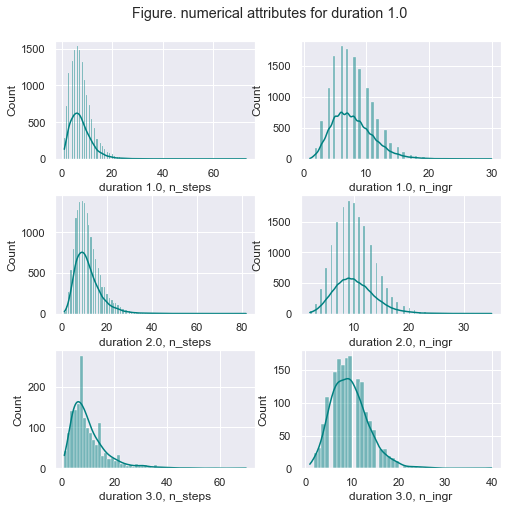

In [200]:
# distribution of each attributes for each class
# final training data used for modelling
col_name = list(range(countvec_chi_train_val_120[0, :].shape[1])) + ["duration"]
final_train_val_df = pd.DataFrame(np.hstack((countvec_chi_train_val_120.toarray(), np.reshape(y_train_val_combined, (-1, 1)))), columns = col_name)
duration1 = list(final_train_val_df.groupby(["duration"]))[0][1]
duration2 = list(final_train_val_df.groupby(["duration"]))[1][1]
duration3 = list(final_train_val_df.groupby(["duration"]))[2][1]

# dist of numerical attributes
sns.set(style = "darkgrid")
fig, axs = plt.subplots(3, 2, figsize = (7, 7))
fig.suptitle("numerical attributes for each duration label")
fig.tight_layout()
sns.histplot(data = duration1, x = 0, kde = True, color = "teal", ax = axs[0,0])
sns.histplot(data = duration1, x = 1, kde = True, color = "teal", ax = axs[0,1])
sns.histplot(data = duration2, x = 0, kde = True, color = "teal", ax = axs[1,0])
sns.histplot(data = duration2, x = 1, kde = True, color = "teal", ax = axs[1,1])
sns.histplot(data = duration3, x = 0, kde = True, color = "teal", ax = axs[2,0])
sns.histplot(data = duration3, x = 1, kde = True, color = "teal", ax = axs[2,1])
xlabel_lst = ["duration 1.0, n_steps", "duration 1.0, n_ingr", "duration 2.0, n_steps", "duration 2.0, n_ingr", "duration 3.0, n_steps", "duration 3.0, n_ingr"]
lbl_count = 0
for i in range(3):
    for j in range(2):
        axs[i, j].xaxis.set_label_text(xlabel_lst[lbl_count])
        lbl_count+=1
        

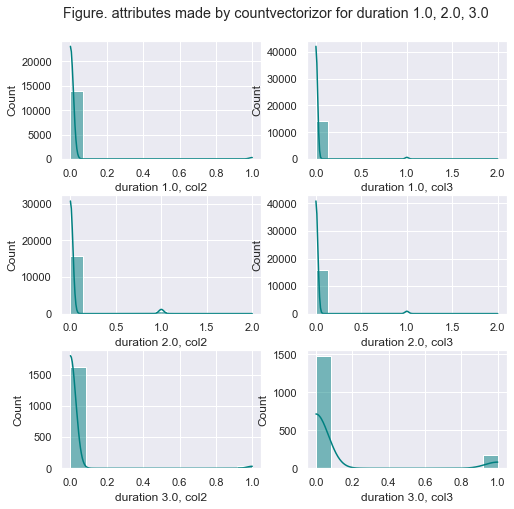

In [202]:
# distribution of countvec feature
sns.set(style = "darkgrid")
fig, axs = plt.subplots(3, 2, figsize = (7, 7))
fig.suptitle("Figure. attributes made by countvectorizor for duration 1.0, 2.0, 3.0")
fig.tight_layout()
sns.histplot(data = duration1, x = 2, kde = True, color = "teal", ax = axs[0, 0])
sns.histplot(data = duration1, x = 3, kde = True, color = "teal", ax = axs[0, 1])
sns.histplot(data = duration2, x = 2, kde = True, color = "teal", ax = axs[1, 0])
sns.histplot(data = duration2, x = 3, kde = True, color = "teal", ax = axs[1, 1])
sns.histplot(data = duration3, x = 2, kde = True, color = "teal", ax = axs[2, 0])
sns.histplot(data = duration3, x = 3, kde = True, color = "teal", ax = axs[2, 1])

xlabel_lst = ["duration 1.0, col2", "duration 1.0, col3", "duration 2.0, col2", "duration 2.0, col3", "duration 3.0, col2", "duration 3.0, col3"]
lbl_count = 0
for i in range(3):
    for j in range(2):
        axs[i, j].xaxis.set_label_text(xlabel_lst[lbl_count])
        lbl_count+=1


In [203]:
#GNB accuracy with different feature set from countvec
# gaussian NB classification with n_steps, n_ingr, duration label
# train the model on train set
model = GaussianNB()
model.fit(countvec_chi_train_val_120[:, :2].toarray(), y_train_val_combined)
# print prediction results
predictions = model.predict(countvec_chi_test_120[:, :2].toarray())
print("gaussian NB classification with n_steps, n_ingr, duration label")
print(classification_report(y_test, predictions))

# gaussian NB with 2 column from 48 selected columns by mi from countvec
# train the model on train set
model = GaussianNB()
model.fit(countvec_chi_train_val_120[:, [2,3]].toarray(), y_train_val_combined)
# print prediction results
predictions = model.predict(countvec_chi_test_120[:, [2,3]].toarray())
print("gaussian NB with 2 column from 48 selected columns by mi from countvec")
print(classification_report(y_test, predictions))

# gaussian NB with 48 attributes selected by mi from countvec
# train the model on train set
model = GaussianNB()
model.fit(countvec_chi_train_val_120[:, 2:].toarray(), y_train_val_combined)
# print prediction results
predictions = model.predict(countvec_chi_test_120[:, 2:].toarray())
print("gaussian NB with 48 attributes selected by mi from countvec")
print(classification_report(y_test, predictions))

# gaussian NB with 48 attributes 2 from numerical attributes and 46 selected by mi from countvec
model = GaussianNB()
model.fit(countvec_chi_train_val_120[:, [0, 1] + list(range(4, countvec_chi_train_val_120.shape[1]))].toarray(), y_train_val_combined)
# print prediction results
predictions = model.predict(countvec_chi_test_120[:, [0, 1] + list(range(4, countvec_chi_train_val_120.shape[1]))].toarray())
print("gaussian NB with 48 attributes 2 from numerical attributes and 46 selected by mi from countvec")
print(classification_report(y_test, predictions))


gaussian NB classification with n_steps, n_ingr, duration label
              precision    recall  f1-score   support

         1.0       0.57      0.74      0.64      3521
         2.0       0.68      0.56      0.61      4080
         3.0       0.28      0.01      0.02       399

    accuracy                           0.61      8000
   macro avg       0.51      0.44      0.43      8000
weighted avg       0.61      0.61      0.60      8000

gaussian NB with 2 column from 48 selected columns by mi from countvec
              precision    recall  f1-score   support

         1.0       0.45      0.97      0.61      3521
         2.0       0.74      0.03      0.06      4080
         3.0       0.31      0.14      0.20       399

    accuracy                           0.45      8000
   macro avg       0.50      0.38      0.29      8000
weighted avg       0.59      0.45      0.31      8000

gaussian NB with 48 attributes selected by mi from countvec
              precision    recall  f1-score

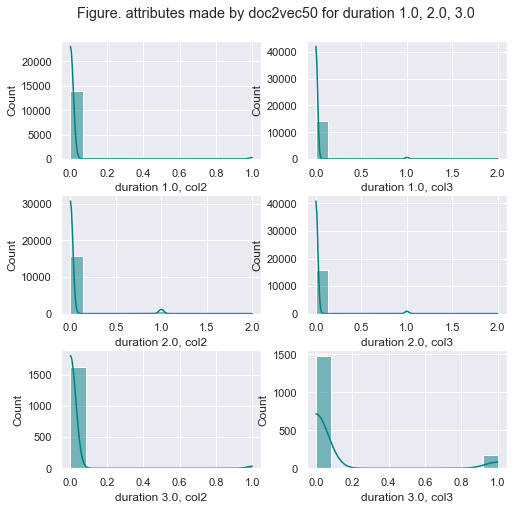

In [204]:
# distribution of each attributes for each class
# final training data used for modelling

# all the doc2vec50 attributes
doc2vec50_all_check_dist = pd.concat([train_name_doc2vec50_df, train_ingr_doc2vec50_df, train_steps_doc2vec50_df], axis=1)
doc2vec50_all_check_dist.columns = list(range(len(doc2vec50_all_check_dist.iloc[0, :])))

doc2vec50_all_check_dist["duration"] = pd.DataFrame(np.reshape(y_train, (-1, 1)))

duration1_doc2vec50 = list(final_train_val_df.groupby(["duration"]))[0][1]
duration2_doc2vec50 = list(final_train_val_df.groupby(["duration"]))[1][1]
duration3_doc2vec50 = list(final_train_val_df.groupby(["duration"]))[2][1]

# distribution of doc2vec features
sns.set(style = "darkgrid")
fig, axs = plt.subplots(3, 2, figsize = (7, 7))
fig.suptitle("Figure. attributes made by doc2vec50 for duration 1.0, 2.0, 3.0")
fig.tight_layout()
sns.histplot(data = duration1_doc2vec50, x = 2, kde = True, color = "teal", ax = axs[0, 0])
sns.histplot(data = duration1_doc2vec50, x = 3, kde = True, color = "teal", ax = axs[0, 1])
sns.histplot(data = duration2_doc2vec50, x = 2, kde = True, color = "teal", ax = axs[1, 0])
sns.histplot(data = duration2_doc2vec50, x = 3, kde = True, color = "teal", ax = axs[1, 1])
sns.histplot(data = duration3_doc2vec50, x = 2, kde = True, color = "teal", ax = axs[2, 0])
sns.histplot(data = duration3_doc2vec50, x = 3, kde = True, color = "teal", ax = axs[2, 1])

xlabel_lst = ["duration 1.0, col2", "duration 1.0, col3", "duration 2.0, col2", "duration 2.0, col3", "duration 3.0, col2", "duration 3.0, col3"]
lbl_count = 0
for i in range(3):
    for j in range(2):
        axs[i, j].xaxis.set_label_text(xlabel_lst[lbl_count])
        lbl_count+=1


##### data for parameter tuning

In [212]:
# prepare smaller dataset for parameter tuning for faster computation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.97, random_state=0)
for train_index, test_index in sss.split(countvec_chi_train_val_140, y_train_val_combined):
    X_train_paramtuning, X_dummy = countvec_chi_train_val_140[train_index], countvec_chi_train_val_140[test_index]
    y_train_paramtuning, y_dummy = y_train_val_combined[train_index], y_train_val_combined[test_index]
    

In [269]:
X_train_paramtuning.shape

(960, 140)

In [230]:
X_dummy.shape

(31040, 140)

In [214]:
len(countvec_chi_test_140.toarray())

8000

### train model with train + val without parameter tuning

In [ ]:
# countvec 140

In [208]:
'''# train the model on train set
model = SVC()
model.fit(countvec_chi_train_val_140 , y_train_val_combined)'''

SVC()

In [209]:
'''# print prediction results
predictions = model.predict(countvec_chi_test_140)
print(classification_report(y_test, predictions))'''

              precision    recall  f1-score   support

         1.0       0.77      0.81      0.79      3521
         2.0       0.81      0.81      0.81      4080
         3.0       0.91      0.56      0.69       399

    accuracy                           0.80      8000
   macro avg       0.83      0.73      0.76      8000
weighted avg       0.80      0.80      0.79      8000



In [270]:
# train the model on train set same as the one used for param tuning
model = SVC()
model.fit(X_train_paramtuning, y_train_paramtuning)

SVC()

In [271]:
# print prediction results
predictions = model.predict(countvec_chi_test_140)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.71      0.73      0.72      3521
         2.0       0.74      0.79      0.76      4080
         3.0       1.00      0.03      0.05       399

    accuracy                           0.73      8000
   macro avg       0.82      0.52      0.51      8000
weighted avg       0.74      0.73      0.71      8000



### train model with train + val with parameter tuning

##### best parameter for rbf kernel

In [224]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# defining parameter range
param_grid_rbf = {'C': [1, 10, 50, 100, 250, 500, 750, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_rbf = GridSearchCV(SVC(), param_grid_rbf, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_rbf.fit(X_train_paramtuning, y_train_paramtuning)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 2/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV 2/5] END ...................C=1, gamma=0.00

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 50, 100, 250, 500, 750, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [225]:
# print best parameter after tuning
print(grid_rbf.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_rbf.best_estimator_)

grid_predictions_rbf = grid_rbf.predict(countvec_chi_test_140)
  
# print classification report
print(classification_report(y_test, grid_predictions_rbf))

{'C': 500, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=500, gamma=0.0001)
              precision    recall  f1-score   support

         1.0       0.73      0.80      0.77      3521
         2.0       0.80      0.77      0.78      4080
         3.0       0.85      0.51      0.64       399

    accuracy                           0.77      8000
   macro avg       0.79      0.69      0.73      8000
weighted avg       0.77      0.77      0.77      8000



In [226]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# defining parameter range
param_grid_poly = {'C':[0.01, 0.1, 1, 10, 100, 1000, 10000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'degree': [2, 3, 4, 5, 6, 7],
              'kernel': ['poly']} 
  
grid_poly = GridSearchCV(SVC(), param_grid_poly, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_poly.fit(X_train_paramtuning, y_train_paramtuning)


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV 1/5] END .........C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.2s
[CV 2/5] END .........C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.1s
[CV 3/5] END .........C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.3s
[CV 4/5] END .........C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.3s
[CV 5/5] END .........C=0.01, degree=2, gamma=1, kernel=poly; total time=   0.2s
[CV 1/5] END .......C=0.01, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 2/5] END .......C=0.01, degree=2, gamma=0.1, kernel=poly; total time=   0.1s
[CV 3/5] END .......C=0.01, degree=2, gamma=0.1, kernel=poly; total time=   0.0s
[CV 4/5] END .......C=0.01, degree=2, gamma=0.1, kernel=poly; total time=   0.1s
[CV 5/5] END .......C=0.01, degree=2, gamma=0.1, kernel=poly; total time=   0.1s
[CV 1/5] END ......C=0.01, degree=2, gamma=0.01, kernel=poly; total time=   0.1s
[CV 2/5] END ......C=0.01, degree=2, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'degree': [2, 3, 4, 5, 6, 7],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=3)

In [227]:
# print best parameter after tuning
print(grid_poly.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_poly.best_estimator_)

grid_predictions_poly = grid_poly.predict(countvec_chi_test_140)
  
# print classification report
print(classification_report(y_test, grid_predictions_poly))

{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, degree=2, gamma=0.1, kernel='poly')
              precision    recall  f1-score   support

         1.0       0.70      0.83      0.76      3521
         2.0       0.82      0.71      0.76      4080
         3.0       0.74      0.56      0.64       399

    accuracy                           0.76      8000
   macro avg       0.75      0.70      0.72      8000
weighted avg       0.76      0.76      0.75      8000



In [228]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_paramtuning, y_train_paramtuning)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ...........................C=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END .............................C=1, kernel=linear; total time=   0.0s
[CV 2/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 3/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 4/5] END .............................C=1, kernel=linear; total time=   0.2s
[CV 5/5] END .............................C=1, kernel=linear; total time=   0.1s
[CV 1/5] END ............................C=10, kernel=linear; total time=   0.7s
[CV 2/5] END ............................C=10, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             verbose=3)

In [229]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(countvec_chi_test_140)
  
# print classification report
print(classification_report(y_test, grid_predictions))

{'C': 0.1, 'kernel': 'linear'}
SVC(C=0.1, kernel='linear')
              precision    recall  f1-score   support

         1.0       0.73      0.80      0.77      3521
         2.0       0.79      0.77      0.78      4080
         3.0       0.84      0.51      0.63       399

    accuracy                           0.77      8000
   macro avg       0.79      0.69      0.73      8000
weighted avg       0.77      0.77      0.77      8000



In [252]:
param_grid = {'C': [0.01],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_paramtuning, y_train_paramtuning)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(countvec_chi_test_140)
  
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 2/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 3/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 4/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
[CV 5/5] END ..........................C=0.01, kernel=linear; total time=   0.0s
{'C': 0.01, 'kernel': 'linear'}
SVC(C=0.01, kernel='linear')
              precision    recall  f1-score   support

         1.0       0.72      0.76      0.74      3521
         2.0       0.77      0.78      0.77      4080
         3.0       0.89      0.20      0.33       399

    accuracy                           0.75      8000
   macro avg       0.79      0.58      0.62      8000
weighted avg       0.75      0.75      0.74      8000



#### check accuracy with trian_val and test set

In [ ]:
# best model
# train the model on train_val set
model_best = SVC(kernel='rbf', C=500, gamma=0.0001)
#check accuracy with validation set
model_best.fit(countvec_chi_train_val_140.todense(), y_train_val_combined)

In [233]:
start = time.time()
acc = model_best.score(countvec_chi_test_140.todense(), y_test)
end = time.time()
t = end - start
print("svc rbf", "\nRandom holdout", 'Time:', t, "\nAccuracy:", acc)

y_pred_best = model_best.predict((countvec_chi_test_140.todense()))

#https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
print('Micro Precision: {}'.format(precision_score(y_test, y_pred_best, average='micro')))
print('Micro Recall: {}'.format(recall_score(y_test, y_pred_best, average='micro')))
print('Micro F1-score: {}\n'.format(f1_score(y_test, y_pred_best, average='micro')))

# print classification report
print(classification_report(y_test, y_pred_best, zero_division = 0))

svc rbf 
Random holdout Time: 31.073968648910522 
Accuracy: 0.79625
Micro Precision: 0.79625
Micro Recall: 0.79625
Micro F1-score: 0.79625

              precision    recall  f1-score   support

         1.0       0.76      0.83      0.79      3521
         2.0       0.83      0.78      0.81      4080
         3.0       0.83      0.63      0.72       399

    accuracy                           0.80      8000
   macro avg       0.81      0.75      0.77      8000
weighted avg       0.80      0.80      0.80      8000



In [235]:
# confusion matrix
confusion_best = confusion_matrix(y_test, y_pred_best, labels=[1.0, 2.0, 3.0])
print('Confusion Matrix\n')
print(confusion_best)

# class label count
val_class_counts = dd(int)
for i in y_test:
    val_class_counts[i] += 1
val_class_counts

Confusion Matrix

[[2922  587   12]
 [ 844 3198   38]
 [  77   72  250]]


defaultdict(int, {1.0: 3521, 2.0: 4080, 3.0: 399})

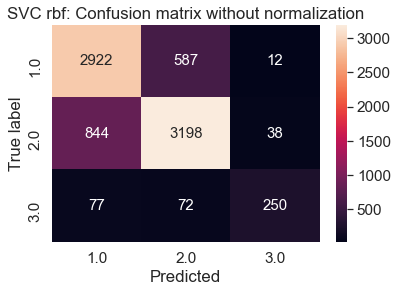

In [295]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
confusion_df_best = pd.DataFrame(confusion_best, range(3), range(3))
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_df_best, annot=True, fmt="d", annot_kws={"size": 15}) # font size
classes = [1.0, 2.0, 3.0]
plt.xticks(np.arange(0.5, len(classes)), classes)
plt.yticks(np.arange(0.5, len(classes)), classes)
plt.title('SVC rbf: Confusion matrix without normalization')
plt.xlabel("Predicted")
plt.ylabel("True label")
plt.show()


In [285]:
def plot_confusion(combined_data, title, models, y_train, y_val):
    for title, model in zip(titles, models):
        # check accuracy with validation set
        model.fit(combined_data[0].todense(), y_train)
        start = time.time()
        acc = model.score(combined_data[1].todense(), y_val)
        end = time.time()
        t = end - start
        print(title, "\nRandom holdout", 'Time:', t, "\nAccuracy:", acc)
        predictions = model.predict((combined_data[1].todense()))
        #https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
        print('Micro Precision: {}'.format(precision_score(y_val, predictions, average='micro')))
        print('Micro Recall: {}'.format(recall_score(y_val, predictions, average='micro')))
        print('Micro F1-score: {}\n'.format(f1_score(y_val, predictions, average='micro')))
        
        # print classification report
        print(classification_report(y_val, predictions, zero_division = 0))
        
        
        # confusion matrix
        confusion = confusion_matrix(y_test, predictions, labels=[1.0, 2.0, 3.0])
        print('Confusion Matrix\n')
        print(confusion)

        # class label count
        val_class_counts = dd(int)
        for i in y_test:
            val_class_counts[i] += 1
        print(f'class count: {val_class_counts}')
        
        # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
        confusion_df = pd.DataFrame(confusion, range(3), range(3))
        sns.set(font_scale=1.4) # for label size
        sns.heatmap(confusion_df, annot=True, fmt="d", annot_kws={"size": 15}) # font size
        classes = [1.0, 2.0, 3.0]
        plt.xticks(np.arange(0.5, len(classes)), classes)
        plt.yticks(np.arange(0.5, len(classes)), classes)
        plt.title(f'{title}: Confusion matrix without normalization')
        plt.xlabel("Predicted")
        plt.ylabel("True label")
        plt.show()

### compare the model with zero r, gnb, dt, svc without parameter tuning

In [261]:
doc2vec_chi140_comparison = [countvec_chi_train_val_140, countvec_chi_test_140, countvec_chi_test_140[0,:]]

Zero-R 
Random holdout Time: 0.0049932003021240234 
Accuracy: 0.51
Micro Precision: 0.51
Micro Recall: 0.51
Micro F1-score: 0.51

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3521
         2.0       0.51      1.00      0.68      4080
         3.0       0.00      0.00      0.00       399

    accuracy                           0.51      8000
   macro avg       0.17      0.33      0.23      8000
weighted avg       0.26      0.51      0.34      8000

Confusion Matrix

[[   0 3521    0]
 [   0 4080    0]
 [   0  399    0]]
class count: defaultdict(<class 'int'>, {1.0: 3521, 2.0: 4080, 3.0: 399})


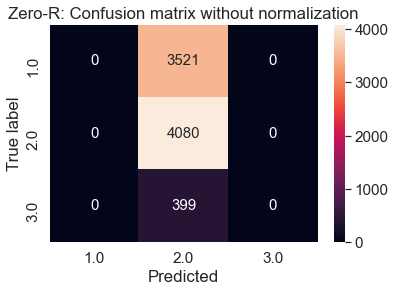

GNB 
Random holdout Time: 0.05200028419494629 
Accuracy: 0.72825
Micro Precision: 0.72825
Micro Recall: 0.72825
Micro F1-score: 0.7282499999999998

              precision    recall  f1-score   support

         1.0       0.70      0.78      0.74      3521
         2.0       0.78      0.69      0.74      4080
         3.0       0.55      0.62      0.59       399

    accuracy                           0.73      8000
   macro avg       0.68      0.70      0.69      8000
weighted avg       0.73      0.73      0.73      8000

Confusion Matrix

[[2747  707   67]
 [1115 2830  135]
 [  69   81  249]]
class count: defaultdict(<class 'int'>, {1.0: 3521, 2.0: 4080, 3.0: 399})


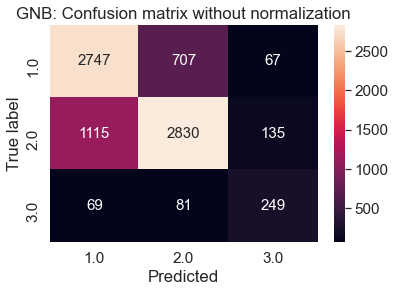

Decision Tree 
Random holdout Time: 0.012031793594360352 
Accuracy: 0.71875
Micro Precision: 0.71875
Micro Recall: 0.71875
Micro F1-score: 0.71875

              precision    recall  f1-score   support

         1.0       0.70      0.73      0.71      3521
         2.0       0.75      0.73      0.74      4080
         3.0       0.56      0.54      0.55       399

    accuracy                           0.72      8000
   macro avg       0.67      0.67      0.67      8000
weighted avg       0.72      0.72      0.72      8000

Confusion Matrix

[[2556  901   64]
 [ 997 2977  106]
 [  86   96  217]]
class count: defaultdict(<class 'int'>, {1.0: 3521, 2.0: 4080, 3.0: 399})


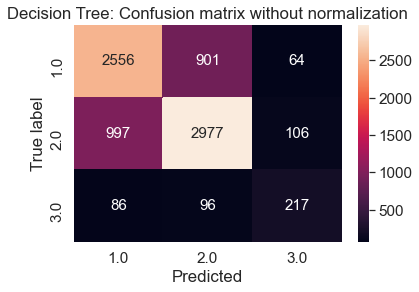

SVC rbf 
Random holdout Time: 26.972137928009033 
Accuracy: 0.795625
Micro Precision: 0.795625
Micro Recall: 0.795625
Micro F1-score: 0.7956250000000001

              precision    recall  f1-score   support

         1.0       0.77      0.81      0.79      3521
         2.0       0.81      0.81      0.81      4080
         3.0       0.91      0.56      0.69       399

    accuracy                           0.80      8000
   macro avg       0.83      0.73      0.76      8000
weighted avg       0.80      0.80      0.79      8000

Confusion Matrix

[[2851  663    7]
 [ 774 3290   16]
 [  76   99  224]]
class count: defaultdict(<class 'int'>, {1.0: 3521, 2.0: 4080, 3.0: 399})


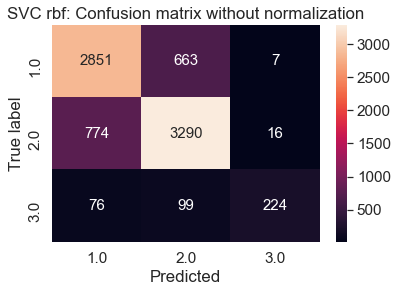

In [286]:
plot_confusion(doc2vec_chi140_comparison, titles, models, y_train_val_combined, y_test)

In [262]:
models_accuracy(doc2vec_chi140_comparison, titles, models, y_train_val_combined, y_test)

Zero-R 
Random holdout Time: 0.0050008296966552734 
Accuracy: 0.51
Micro Precision: 0.51
Micro Recall: 0.51
Micro F1-score: 0.51

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      3521
         2.0       0.51      1.00      0.68      4080
         3.0       0.00      0.00      0.00       399

    accuracy                           0.51      8000
   macro avg       0.17      0.33      0.23      8000
weighted avg       0.26      0.51      0.34      8000

GNB 
Random holdout Time: 0.04200243949890137 
Accuracy: 0.72825
Micro Precision: 0.72825
Micro Recall: 0.72825
Micro F1-score: 0.7282499999999998

              precision    recall  f1-score   support

         1.0       0.70      0.78      0.74      3521
         2.0       0.78      0.69      0.74      4080
         3.0       0.55      0.62      0.59       399

    accuracy                           0.73      8000
   macro avg       0.68      0.70      0.69      8000
weighted avg   

### evaluate model with real test set (from test.csv)
#### perform same feature seletion on test.csv data

In [238]:
vec_m_train_val_test_final_prediction = vec_m_train_val_test.copy()
vec_m_train_val_test_final_prediction

{0: [<25600x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 97721 stored elements in Compressed Sparse Row format>,
  <6400x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 24429 stored elements in Compressed Sparse Row format>,
  <8000x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 30566 stored elements in Compressed Sparse Row format>],
 1: [<25600x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 392963 stored elements in Compressed Sparse Row format>,
  <6400x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 98031 stored elements in Compressed Sparse Row format>,
  <8000x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 123183 stored elements in Compressed Sparse Row format>],
 2: [<25600x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 1112165 stored elements in Compressed Sparse Row format>,
  <6400x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 276360 stored elements in Compressed Sparse Row f

In [241]:
# only train and val were used for feature selection for the best model
# so swap the test from train.csv to test from test.csv
vec_m_train_val_test_final_prediction[IDX_NAME][2] = test_name_vec_m
vec_m_train_val_test_final_prediction[IDX_INGR][2] = test_ingr_vec_m
vec_m_train_val_test_final_prediction[IDX_STEPS][2] = test_steps_vec_m 
vec_m_train_val_test_final_prediction

{0: [<25600x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 97721 stored elements in Compressed Sparse Row format>,
  <6400x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 24429 stored elements in Compressed Sparse Row format>,
  <10000x10892 sparse matrix of type '<class 'numpy.int64'>'
  	with 36683 stored elements in Compressed Sparse Row format>],
 1: [<25600x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 392963 stored elements in Compressed Sparse Row format>,
  <6400x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 98031 stored elements in Compressed Sparse Row format>,
  <10000x2906 sparse matrix of type '<class 'numpy.int64'>'
  	with 152363 stored elements in Compressed Sparse Row format>],
 2: [<25600x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 1112165 stored elements in Compressed Sparse Row format>,
  <6400x17967 sparse matrix of type '<class 'numpy.int64'>'
  	with 276360 stored elements in Compressed Sparse Row

In [242]:
# reduce each attribute separately down to 50
vec_m_train_val_test_chi50_final_prediction = {}
for idx, attr in vec_m_train_val_test_final_prediction.items():
    train = attr[0]
    val = attr[1]
    test = attr[2]
    # perform feature selection to reduce feature to 50
    vec_m_train_val_test_chi50_final_prediction[idx] = chi_selection(train, val, test, y_train, 50, vocab_train=vocab_train_lst[idx])
    

chi selected features: ['avocado', 'baked', 'beef', 'bread', 'brisket', 'brownies', 'burgundy', 'butt', 'cake', 'casserole', 'chicken', 'chili', 'cooked', 'cooker', 'corned', 'crock', 'crockpot', 'dip', 'dressing', 'frozen', 'ice', 'jerky', 'lasagna', 'meatloaf', 'pancakes', 'pie', 'pork', 'pot', 'potato', 'potatoes', 'pulled', 'quiche', 'ribs', 'roast', 'salad', 'salsa', 'sandwich', 'sauce', 'short', 'shredded', 'slow', 'smoothie', 'soup', 'sourdough', 'spread', 'steak', 'stew', 'stock', 'stuffed', 'vinaigrette']
chi selected features: ['baking', 'bay', 'beef', 'boneless', 'breadcrumbs', 'brisket', 'broth', 'brown', 'butter', 'carrots', 'celery', 'cheddar', 'cheese', 'chicken', 'chuck', 'cinnamon', 'cloves', 'cream', 'diced', 'dried', 'egg', 'eggs', 'flour', 'ground', 'ice', 'lettuce', 'mayonnaise', 'meat', 'milk', 'onion', 'pie', 'pork', 'potatoes', 'powder', 'purpose', 'ribs', 'roast', 'salt', 'sauce', 'shoulder', 'soda', 'soup', 'stew', 'stewing', 'sugar', 'thyme', 'tomato', 'unsal

In [246]:
# mi
# combine all features
#numerical features
train_chi_final_prediction = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[0], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[0], (-1, 1)))))
val_chi_final_prediction = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_train_val_test[1], (-1, 1)), np.reshape(X_n_ingr_m_train_val_test[1], (-1, 1)))))
test_chi_final_prediction = scipy.sparse.csr_matrix(np.hstack((np.reshape(X_n_steps_m_test, (-1, 1)), np.reshape(X_n_ingr_m_test, (-1, 1)))))

# combine each attributes
for attr in vec_m_train_val_test_chi50_final_prediction.values():
    # add train
    train_chi_final_prediction = scipy.sparse.hstack([train_chi_final_prediction, attr[0]])
    # add val
    val_chi_final_prediction = scipy.sparse.hstack([val_chi_final_prediction, attr[1]])
    # add test
    test_chi_final_prediction = scipy.sparse.hstack([test_chi_final_prediction, attr[2]])


In [247]:
# perform feature selection on combined datasets(50 x 3 + 2 features for train in train.csv) down to 50, 
# select same feature for val in train.csv and test in test.csv
chi_combined_data_final_prediction = chi_selection(train_chi_final_prediction, val_chi_final_prediction, test_chi_final_prediction, y_train, 140, vocab_train=False)
chi_combined_data_final_prediction

[<25600x140 sparse matrix of type '<class 'numpy.int64'>'
 	with 406770 stored elements in Compressed Sparse Row format>,
 <6400x140 sparse matrix of type '<class 'numpy.int64'>'
 	with 100802 stored elements in Compressed Sparse Row format>,
 <10000x140 sparse matrix of type '<class 'numpy.int64'>'
 	with 157753 stored elements in Compressed Sparse Row format>]

In [248]:
# combine train + val
train_val_chi_final_prediction = scipy.sparse.vstack([chi_combined_data_final_prediction[0], chi_combined_data_final_prediction[1]])

# train the model with train + val using the best performing model
model_final = SVC(kernel='rbf', C=500, gamma=0.0001)
model_final.fit(train_val_chi_final_prediction.todense(), y_train_val_combined)

SVC(C=500, gamma=0.0001)

In [249]:
# predtct test from test.csv
predictions_final = model_final.predict((chi_combined_data_final_prediction[2].todense()))

In [250]:
# create an output csv
output = pd.DataFrame()
output['duration_label'] = predictions_final
output['id'] = output.index + 1
output = output.loc[:, ['id', 'duration_label']]

In [251]:
output.to_csv("output_chi140.csv", index=False)

In [320]:
model_lst

[DummyClassifier(strategy='most_frequent'),
 GaussianNB(),
 DecisionTreeClassifier(random_state=0),
 SVC(C=1000, gamma=0.0001)]

In [321]:
model_final_0R = DummyClassifier(strategy='most_frequent')
model_final_0R.fit(train_val_chi_final_prediction.todense(), y_train_val_combined)
# predtct test from test.csv
predictions_final_0R = model_final_0R.predict((chi_combined_data_final_prediction[2].todense()))
# create an output csv
output1 = pd.DataFrame()
output1['duration_label'] = predictions_final_0R
output1['id'] = output1.index + 1
output1 = output1.loc[:, ['id', 'duration_label']]
output1.to_csv("output_0R.csv", index=False)

In [322]:
model_final_gnb = GaussianNB()
model_final_gnb.fit(train_val_chi_final_prediction.todense(), y_train_val_combined)
# predtct test from test.csv
predictions_final_gnb = model_final_gnb.predict((chi_combined_data_final_prediction[2].todense()))
# create an output csv
output2 = pd.DataFrame()
output2['duration_label'] = predictions_final_gnb
output2['id'] = output2.index + 1
output2 = output2.loc[:, ['id', 'duration_label']]
output2.to_csv("output_gnb.csv", index=False)

In [323]:
model_final_dt = DecisionTreeClassifier(random_state=0)
model_final_dt.fit(train_val_chi_final_prediction.todense(), y_train_val_combined)
# predtct test from test.csv
predictions_final_dt = model_final_dt.predict((chi_combined_data_final_prediction[2].todense()))
# create an output csv
output3 = pd.DataFrame()
output3['duration_label'] = predictions_final_dt
output3['id'] = output3.index + 1
output3 = output3.loc[:, ['id', 'duration_label']]
output3.to_csv("output_dt.csv", index=False)

### MSE vs train test size

In [302]:
countvec_chi_train_val_140

<32000x140 sparse matrix of type '<class 'numpy.int64'>'
	with 507572 stored elements in Compressed Sparse Row format>

In [303]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
train_analysis = []
test_analysis = []
for testsize in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    sss1 = StratifiedShuffleSplit(n_splits=1, test_size=testsize, random_state=0)
    for train_index, test_index in sss1.split(countvec_chi_train_val_140, y_train_val_combined):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = countvec_chi_train_val_140[train_index], countvec_chi_train_val_140[test_index]
        y_train, y_test = y_train_val_combined[train_index], y_train_val_combined[test_index]
        train_analysis.append((X_train, y_train))
        test_analysis.append((X_test, y_test))
        

TRAIN: [16170 25805 26626 ...  5890 30212 14869] TEST: [22177  2797   790 ... 25862  8545 26441]
TRAIN: [17834 31841 23780 ... 23438  5890 19032] TEST: [23154 28568 27119 ... 16283 14680  6216]
TRAIN: [ 7215 21534 23799 ...  6365  5890   662] TEST: [15834  6416 26358 ...   434 15838  3174]
TRAIN: [ 2903 26964  2547 ... 12975  5890 24214] TEST: [12850 29756 16576 ... 27389 27686 18342]
TRAIN: [21138 29384 30754 ...  5890 20591 21801] TEST: [27321 26899 20373 ... 20998 12799 30789]
TRAIN: [ 6014 29328  2352 ... 17571  5890 31213] TEST: [21516  8074 23399 ... 30352 14610 29876]
TRAIN: [ 4956 22448 18567 ... 24378 17571  5890] TEST: [15815  5152 15903 ... 28596 12481 24156]
TRAIN: [31757 30652 20047 ... 10270  4309 30282] TEST: [ 1377 26711 22080 ... 15045 22435 27060]
TRAIN: [23206 19695  3618 ... 27421  5241 17602] TEST: [ 8204 25912 23693 ... 23769 29723 27513]


In [304]:
model_lst = [DummyClassifier(strategy='most_frequent'),
             GaussianNB(),
             DecisionTreeClassifier(random_state=0),
             SVC(C=1000, gamma=0.0001)]

In [305]:
sss2 = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
# key: size of test, val: [trainmselst, testmselst]
mse_dict = {}
pred_dict = {}
# differnt train test size
for i in list(range(9)):
    X, y = train_analysis[i]
    X_test, y_test = test_analysis[i]
    # for each model,
    # measure MSE for train and test for each iteration of cross val, 
    # get class label distribution
    # calculate accuracy, fscore, precision, recall
    
    for model in model_lst:
        mse_train = []
        mse_test = []
        #pred_train = []
        pred_test = []
        accuracy_lst = [] 
        fscore_lst = [] 
        precision_lst = [] 
        recall_lst = []
    
        for train_index, test_index in sss2.split(X, y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]
            model.fit(X_train.todense(), y_train)

            y_pred_train = model.predict(X_train.todense())
            y_pred_test = model.predict(X_test.todense())

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))
            #pred_train.append(y_pred_train)
            pred_test.append(y_pred_test)

        mse_dict[(i+1, model)] = [mse_train, mse_test]
        pred_dict[(i+1, model)] = pred_test #[[pred1], [pred2], [pred3]]
        

In [306]:
mse_dict

{(1,
  DummyClassifier(strategy='most_frequent')): [[0.49483506944444444,
   0.49483506944444444,
   0.49483506944444444], [0.4946875, 0.4946875, 0.4946875]],
 (1,
  GaussianNB()): [[0.3138020833333333,
   0.33893229166666666,
   0.3181423611111111], [0.3203125, 0.3471875, 0.33125]],
 (1,
  DecisionTreeClassifier(random_state=0)): [[0.00026041666666666666,
   0.00026041666666666666,
   8.680555555555556e-05], [0.341875, 0.3471875, 0.33625]],
 (1,
  SVC(C=1000, gamma=0.0001)): [[0.229296875,
   0.23146701388888888,
   0.2265625], [0.2475, 0.249375, 0.251875]],
 (2,
  DummyClassifier(strategy='most_frequent')): [[0.49482421875,
   0.49482421875,
   0.49482421875], [0.49484375, 0.49484375, 0.49484375]],
 (2, GaussianNB()): [[0.32880859375, 0.326220703125, 0.31396484375],
  [0.34609375, 0.34421875, 0.331875]],
 (2,
  DecisionTreeClassifier(random_state=0)): [[0.0001953125,
   0.000244140625,
   0.000244140625], [0.3509375, 0.33875, 0.3471875]],
 (2,
  SVC(C=1000, gamma=0.0001)): [[0.232128

In [307]:
pred_dict

{(1,
  DummyClassifier(strategy='most_frequent')): [array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.])],
 (1, GaussianNB()): [array([1., 2., 3., ..., 2., 1., 2.]),
  array([1., 2., 3., ..., 1., 1., 2.]),
  array([1., 2., 3., ..., 2., 1., 2.])],
 (1,
  DecisionTreeClassifier(random_state=0)): [array([1., 1., 3., ..., 2., 1., 2.]), array([1., 2., 3., ..., 2., 1., 2.]), array([2., 2., 3., ..., 2., 1., 2.])],
 (1, SVC(C=1000, gamma=0.0001)): [array([1., 2., 3., ..., 2., 1., 2.]),
  array([1., 2., 3., ..., 2., 1., 2.]),
  array([1., 2., 3., ..., 2., 1., 2.])],
 (2,
  DummyClassifier(strategy='most_frequent')): [array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.])],
 (2, GaussianNB()): [array([2., 2., 1., ..., 2., 1., 1.]),
  array([2., 2., 1., ..., 2., 1., 1.]),
  array([2., 2., 1., ..., 2., 1., 1.])],
 (2,
  DecisionTreeClassifier(random_state=0)): [array([2., 2., 1., .

In [ ]:
# for each model,
# plot MSE for train and test for each iteration of cross val (trainmse = msedict[2][1][i], testmse = msedict[2][2][i], test is 20 %)
# plot MSE vs size (trainmse = msedict[key][1][i] vs key, testmse = msedict[key][2][i] vs key)
# compare predicted and actual class label distribution (compare distribution of pred_dict[(2, model)] and testanalysis[i])
# calculate accuracy, fscore, precision, recall

In [308]:
mse_train = []
mse_test = []
model_name = []
model_size = []
for j in range(1, 10):
    for model in model_lst:
        # get mse dict for each model with 8:2 split
        dict_mse = mse_dict[(j, model)]
        for i in range(3):
            mse_train.append(dict_mse[0][i])
            mse_test.append(dict_mse[1][i])
            model_name.append(str(model))
            model_size.append(j / 10)
data = {'model':model_name,
        'train':mse_train,
        'test': mse_test,
        'size': model_size
       }
mse_df = pd.DataFrame(data)

In [309]:
mse_df.groupby(mse_df['size']).sum()

,train,test
size,,
0.1,3.143316,4.256875
0.2,3.141650,4.304375
0.3,3.138672,4.298125
0.4,3.116732,4.252813
0.5,3.097344,4.259875
0.6,3.120508,4.296198
0.7,3.160026,4.338750
0.8,3.102930,4.372813
0.9,3.096094,4.507951


<AxesSubplot:>

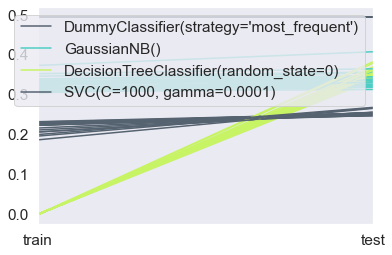

In [310]:
pd.plotting.parallel_coordinates(
    mse_df.loc[:, ['model', 'train', 'test']], 'model', color=('#556270', '#4ECDC4', '#C7F464')
)


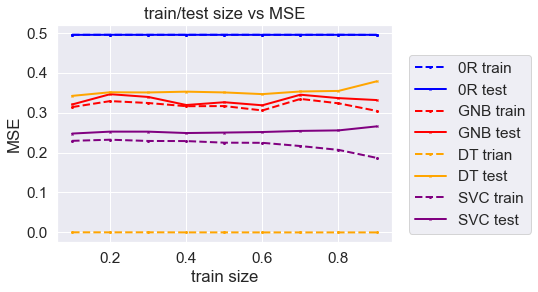

In [318]:
mse_train = []
mse_test = []
model_name = []
model_size = []
for j in range(1, 10):
    for model in model_lst:
        # get mse dict for each model with 8:2 split
        dict_mse = mse_dict[(j, model)]
        
        mse_train.append(dict_mse[0][0])
        mse_test.append(dict_mse[1][0])
        model_name.append(str(model))
        model_size.append(j / 10)
        
data = {'model':model_name,
        'train':mse_train,
        'test': mse_test,
        'size': model_size
       }

mse_df = pd.DataFrame(data)
# multiple line plots
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "DummyClassifier(strategy='most_frequent')"], marker='o', linestyle='--', markersize=2, color='blue', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "DummyClassifier(strategy='most_frequent')"], marker='x', markersize=2, color='blue', linewidth=2)
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "GaussianNB()"], marker='o', linestyle='--', markersize=2, color='red', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "GaussianNB()"], marker='x', markersize=2, color='red', linewidth=2)
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "DecisionTreeClassifier(random_state=0)"], marker='o', linestyle='--', markersize=2, color='orange', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "DecisionTreeClassifier(random_state=0)"], marker='x', markersize=2, color='orange', linewidth=2)
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "SVC(C=1000, gamma=0.0001)"], marker='o', linestyle='--', markersize=2, color='purple', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "SVC(C=1000, gamma=0.0001)"], marker='x', markersize=2, color='purple', linewidth=2)

plt.title("train/test size vs MSE")
plt.legend(loc='right', bbox_to_anchor=(0.34, 0.15, 1.1, 0.6), labels = ['0R train', '0R test', 'GNB train', "GNB test", "DT trian", "DT test", "SVC train", "SVC test"])
plt.xlabel("train size")
plt.ylabel("MSE")

# show graph
plt.show()

#### Not necessary: Extra code from previous version of model with mi filtering

In [424]:
train_val_mi_final_prediction

<32000x50 sparse matrix of type '<class 'numpy.int64'>'
	with 356052 stored elements in Compressed Sparse Row format>

In [437]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
train_analysis = []
test_analysis = []
for testsize in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    sss1 = StratifiedShuffleSplit(n_splits=1, test_size=testsize, random_state=0)
    for train_index, test_index in sss1.split(train_val_mi_final_prediction, y_train_val_combined):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = train_val_mi_final_prediction[train_index], train_val_mi_final_prediction[test_index]
        y_train, y_test = y_train_val_combined[train_index], y_train_val_combined[test_index]
        train_analysis.append((X_train, y_train))
        test_analysis.append((X_test, y_test))
        

TRAIN: [16170 25805 26626 ...  5890 30212 14869] TEST: [22177  2797   790 ... 25862  8545 26441]
TRAIN: [17834 31841 23780 ... 23438  5890 19032] TEST: [23154 28568 27119 ... 16283 14680  6216]
TRAIN: [ 7215 21534 23799 ...  6365  5890   662] TEST: [15834  6416 26358 ...   434 15838  3174]
TRAIN: [ 2903 26964  2547 ... 12975  5890 24214] TEST: [12850 29756 16576 ... 27389 27686 18342]
TRAIN: [21138 29384 30754 ...  5890 20591 21801] TEST: [27321 26899 20373 ... 20998 12799 30789]
TRAIN: [ 6014 29328  2352 ... 17571  5890 31213] TEST: [21516  8074 23399 ... 30352 14610 29876]
TRAIN: [ 4956 22448 18567 ... 24378 17571  5890] TEST: [15815  5152 15903 ... 28596 12481 24156]
TRAIN: [31757 30652 20047 ... 10270  4309 30282] TEST: [ 1377 26711 22080 ... 15045 22435 27060]
TRAIN: [23206 19695  3618 ... 27421  5241 17602] TEST: [ 8204 25912 23693 ... 23769 29723 27513]


In [468]:
model_lst = [DummyClassifier(strategy='most_frequent'),
             GaussianNB(),
             DecisionTreeClassifier(random_state=0),
             SVC(C=1000, gamma=0.0001)]

In [478]:


sss2 = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
# key: size of test, val: [trainmselst, testmselst]
mse_dict = {}
pred_dict = {}
# differnt train test size
for i in list(range(9)):
    X, y = train_analysis[i]
    X_test, y_test = test_analysis[i]
    # for each model,
    # measure MSE for train and test for each iteration of cross val, 
    # get class label distribution
    # calculate accuracy, fscore, precision, recall
    #for m in models_lst:
    
    
    for model in model_lst:
        mse_train = []
        mse_test = []
        #pred_train = []
        pred_test = []
        accuracy_lst = [] 
        fscore_lst = [] 
        precision_lst = [] 
        recall_lst = []
    
        for train_index, test_index in sss2.split(X, y):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]
            model.fit(X_train.todense(), y_train)

            y_pred_train = model.predict(X_train.todense())
            y_pred_test = model.predict(X_test.todense())

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))
            #pred_train.append(y_pred_train)
            pred_test.append(y_pred_test)

        mse_dict[(i+1, model)] = [mse_train, mse_test]
        pred_dict[(i+1, model)] = pred_test #[[pred1], [pred2], [pred3]]
        

In [479]:
mse_dict

{(1,
  DummyClassifier(strategy='most_frequent')): [[0.49483506944444444,
   0.49483506944444444,
   0.49483506944444444], [0.4946875, 0.4946875, 0.4946875]],
 (1, GaussianNB()): [[0.340625, 0.3512152777777778, 0.34796006944444446],
  [0.3484375, 0.3578125, 0.35125]],
 (1,
  DecisionTreeClassifier(random_state=0)): [[0.004774305555555556,
   0.003732638888888889,
   0.004774305555555556], [0.351875, 0.381875, 0.363125]],
 (1,
  SVC(C=1000, gamma=0.0001)): [[0.2513888888888889,
   0.2572048611111111,
   0.25559895833333335], [0.2646875, 0.265625, 0.2659375]],
 (2,
  DummyClassifier(strategy='most_frequent')): [[0.49482421875,
   0.49482421875,
   0.49482421875], [0.49484375, 0.49484375, 0.49484375]],
 (2, GaussianNB()): [[0.34638671875, 0.34404296875, 0.33623046875],
  [0.35796875, 0.35890625, 0.35640625]],
 (2,
  DecisionTreeClassifier(random_state=0)): [[0.005029296875,
   0.004833984375,
   0.004931640625], [0.37125, 0.3690625, 0.3671875]],
 (2,
  SVC(C=1000, gamma=0.0001)): [[0.2566

In [480]:
pred_dict

{(1,
  DummyClassifier(strategy='most_frequent')): [array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.])],
 (1, GaussianNB()): [array([1., 2., 1., ..., 2., 1., 1.]),
  array([1., 2., 1., ..., 2., 1., 1.]),
  array([1., 2., 1., ..., 2., 1., 1.])],
 (1,
  DecisionTreeClassifier(random_state=0)): [array([1., 1., 3., ..., 2., 1., 2.]), array([1., 1., 3., ..., 1., 1., 2.]), array([1., 1., 3., ..., 2., 1., 2.])],
 (1, SVC(C=1000, gamma=0.0001)): [array([1., 1., 1., ..., 2., 1., 2.]),
  array([1., 1., 1., ..., 2., 1., 2.]),
  array([1., 2., 1., ..., 2., 1., 2.])],
 (2,
  DummyClassifier(strategy='most_frequent')): [array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.]), array([2., 2., 2., ..., 2., 2., 2.])],
 (2, GaussianNB()): [array([2., 2., 1., ..., 2., 1., 1.]),
  array([2., 2., 1., ..., 2., 1., 1.]),
  array([2., 2., 1., ..., 2., 1., 1.])],
 (2,
  DecisionTreeClassifier(random_state=0)): [array([2., 2., 1., .

In [ ]:
# for each model,
# plot MSE for train and test for each iteration of cross val (trainmse = msedict[2][1][i], testmse = msedict[2][2][i], test is 20 %)
# plot MSE vs size (trainmse = msedict[key][1][i] vs key, testmse = msedict[key][2][i] vs key)
# compare predicted and actual class label distribution (compare distribution of pred_dict[(2, model)] and testanalysis[i])
# calculate accuracy, fscore, precision, recall

In [523]:
mse_train = []
mse_test = []
model_name = []
model_size = []
for j in range(1, 10):
    for model in model_lst:
        # get mse dict for each model with 8:2 split
        dict_mse = mse_dict[(j, model)]
        for i in range(3):
            mse_train.append(dict_mse[0][i])
            mse_test.append(dict_mse[1][i])
            model_name.append(str(model))
            model_size.append(j / 10)
data = {'model':model_name,
        'train':mse_train,
        'test': mse_test,
        'size': model_size
       }
mse_df = pd.DataFrame(data)

In [524]:
mse_df.groupby(mse_df['size']).sum()

,train,test
size,,
0.1,3.301780,4.434687
0.2,3.287109,4.475312
0.3,3.281529,4.444583
0.4,3.296940,4.455078
0.5,3.283750,4.446937
0.6,3.268164,4.457760
0.7,3.269141,4.427768
0.8,3.243750,4.464102
0.9,3.176563,4.407778


<AxesSubplot:>

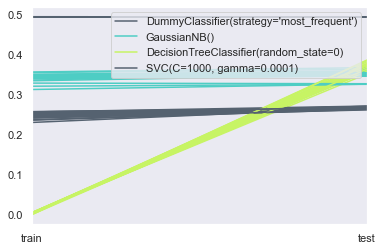

In [525]:
pd.plotting.parallel_coordinates(
    mse_df.loc[:, ['model', 'train', 'test']], 'model', color=('#556270', '#4ECDC4', '#C7F464')
)


[DummyClassifier(strategy='most_frequent'),
 GaussianNB(),
 DecisionTreeClassifier(random_state=0),
 SVC(C=1000, gamma=0.0001)]

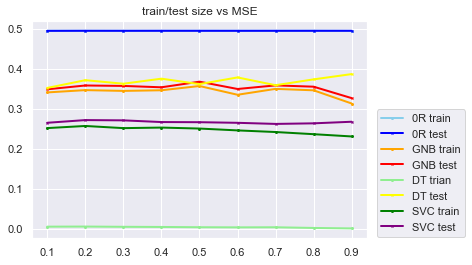

In [568]:
########stratified
mse_train = []
mse_test = []
model_name = []
model_size = []
for j in range(1, 10):
    for model in model_lst:
        # get mse dict for each model with 8:2 split
        dict_mse = mse_dict[(j, model)]
        
        mse_train.append(dict_mse[0][0])
        mse_test.append(dict_mse[1][0])
        model_name.append(str(model))
        model_size.append(j / 10)
        
data = {'model':model_name,
        'train':mse_train,
        'test': mse_test,
        'size': model_size
       }
mse_df = pd.DataFrame(data)
# multiple line plots
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "DummyClassifier(strategy='most_frequent')"], marker='o', markersize=2, color='skyblue', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "DummyClassifier(strategy='most_frequent')"], marker='x', markersize=2, color='blue', linewidth=2)
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "GaussianNB()"], marker='o', markersize=2, color='orange', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "GaussianNB()"], marker='x', markersize=2, color='red', linewidth=2)
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "DecisionTreeClassifier(random_state=0)"], marker='o', markersize=2, color='lightgreen', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "DecisionTreeClassifier(random_state=0)"], marker='x', markersize=2, color='yellow', linewidth=2)
plt.plot('size', 'train', data=mse_df[mse_df['model'] == "SVC(C=1000, gamma=0.0001)"], marker='o', markersize=2, color='green', linewidth=2)
plt.plot('size', 'test', data=mse_df[mse_df['model'] == "SVC(C=1000, gamma=0.0001)"], marker='x', markersize=2, color='purple', linewidth=2)

plt.title("train/test size vs MSE")
plt.legend(loc='right', bbox_to_anchor=(0.21, 0, 1.1, 0.6), labels = ['0R train', '0R test', 'GNB train', "GNB test", "DT trian", "DT test", "SVC train", "SVC test"])

# show graph
plt.show()

In [570]:
# random holdout
train_analysis_rhold = []
test_analysis_rhold = []
for testsize in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    X_train, X_test, y_train, y_test = train_test_split(train_val_mi_final_prediction, y_train_val_combined, test_size=testsize, random_state=0)
    train_analysis_rhold.append((X_train, y_train))
    test_analysis_rhold.append((X_test, y_test))



# key: size of test, val: [trainmselst, testmselst]
mse_dict_rhold = {}
pred_dict_rhold = {}
# differnt train test size
for i in list(range(9)):
    X, y = train_analysis_rhold[i]
    X_test, y_test = test_analysis_rhold[i]
    # for each model,
    # measure MSE for train and test for each iteration of cross val, 
    # get class label distribution
    # calculate accuracy, fscore, precision, recall
    #for m in models_lst:
    
    
    for model in model_lst:
        mse_train = []
        mse_test = []
        #pred_train = []
        pred_test = []
        accuracy_lst = [] 
        fscore_lst = [] 
        precision_lst = [] 
        recall_lst = []
    
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
        model.fit(X_train.todense(), y_train)

        y_pred_train = model.predict(X_train.todense())
        y_pred_test = model.predict(X_test.todense())

        mse_train.append(mean_squared_error(y_train, y_pred_train))
        mse_test.append(mean_squared_error(y_test, y_pred_test))
        #pred_train.append(y_pred_train)
        pred_test.append(y_pred_test)
        
        mse_dict_rhold[(i+1, model)] = [mse_train, mse_test]
        pred_dict_rhold[(i+1, model)] = pred_test #[[pred1], [pred2], [pred3]]
        

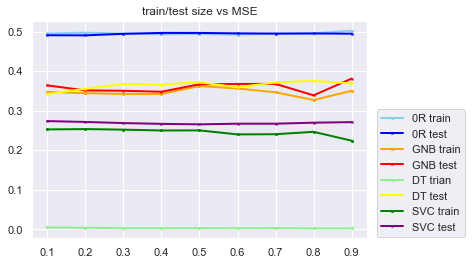

In [571]:
mse_train = []
mse_test = []
model_name = []
model_size = []
for j in range(1, 10):
    for model in model_lst:
        # get mse dict for each model with 8:2 split
        dict_mse = mse_dict_rhold[(j, model)]
        
        mse_train.append(dict_mse[0][0])
        mse_test.append(dict_mse[1][0])
        model_name.append(str(model))
        model_size.append(j / 10)
        
data = {'model':model_name,
        'train':mse_train,
        'test': mse_test,
        'size': model_size
       }
mse_df_rhold = pd.DataFrame(data)
# multiple line plots
plt.plot('size', 'train', data=mse_df_rhold[mse_df_rhold['model'] == "DummyClassifier(strategy='most_frequent')"], marker='o', markersize=2, color='skyblue', linewidth=2)
plt.plot('size', 'test', data=mse_df_rhold[mse_df_rhold['model'] == "DummyClassifier(strategy='most_frequent')"], marker='x', markersize=2, color='blue', linewidth=2)
plt.plot('size', 'train', data=mse_df_rhold[mse_df_rhold['model'] == "GaussianNB()"], marker='o', markersize=2, color='orange', linewidth=2)
plt.plot('size', 'test', data=mse_df_rhold[mse_df_rhold['model'] == "GaussianNB()"], marker='x', markersize=2, color='red', linewidth=2)
plt.plot('size', 'train', data=mse_df_rhold[mse_df_rhold['model'] == "DecisionTreeClassifier(random_state=0)"], marker='o', markersize=2, color='lightgreen', linewidth=2)
plt.plot('size', 'test', data=mse_df_rhold[mse_df_rhold['model'] == "DecisionTreeClassifier(random_state=0)"], marker='x', markersize=2, color='yellow', linewidth=2)
plt.plot('size', 'train', data=mse_df_rhold[mse_df_rhold['model'] == "SVC(C=1000, gamma=0.0001)"], marker='o', markersize=2, color='green', linewidth=2)
plt.plot('size', 'test', data=mse_df_rhold[mse_df_rhold['model'] == "SVC(C=1000, gamma=0.0001)"], marker='x', markersize=2, color='purple', linewidth=2)

plt.title("train/test size vs MSE")
plt.legend(loc='right', bbox_to_anchor=(0.21, 0, 1.1, 0.6), labels = ['0R train', '0R test', 'GNB train', "GNB test", "DT trian", "DT test", "SVC train", "SVC test"])

# show graph
plt.show()

##### check stratification vs holdout

In [456]:
# for train, test, 8:2, fit the model with randomholdout, stratified 
# compare accuaracy, f score, mse on test, mse on train 

#2:8 stratified sampling
X_train_s, y_train_s = train_analysis[1]
X_test_s, y_test_s = test_analysis[1]
#random holdout
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(train_val_mi_final_prediction, y_train_val_combined, test_size=0.2, random_state=0)

In [457]:
def model_analysis(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train.todense())
    y_pred_test = model.predict(X_test.todense())
    print(f'mse on train: {mean_squared_error(y_train, y_pred_train)}')
    print(f'mse on test: {mean_squared_error(y_test, y_pred_test)}')

    print('Micro Precision: {}'.format(precision_score(y_test, y_pred_test, average='micro')))
    print('Micro Recall: {}'.format(recall_score(y_test, y_pred_test, average='micro')))
    print('Micro F1-score: {}\n'.format(f1_score(y_test, y_pred_test, average='micro')))

    # print classification report
    print(classification_report(y_test, y_pred_test, zero_division = 0))

In [465]:
model = DummyClassifier(strategy='most_frequent')
model.fit(X_train_s.todense(), y_train_s)
model_analysis(model, X_train_s, X_test_s, y_train_s, y_test_s)

model = DummyClassifier(strategy='most_frequent')
model.fit(X_train_r.todense(), y_train_r)
model_analysis(model, X_train_r, X_test_r, y_train_r, y_test_r)

mse on train: 0.4948046875
mse on test: 0.49484375
Micro Precision: 0.50515625
Micro Recall: 0.50515625
Micro F1-score: 0.50515625

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2837
         2.0       0.51      1.00      0.67      3233
         3.0       0.00      0.00      0.00       330

    accuracy                           0.51      6400
   macro avg       0.17      0.33      0.22      6400
weighted avg       0.26      0.51      0.34      6400

mse on train: 0.4959375
mse on test: 0.4903125
Micro Precision: 0.5096875
Micro Recall: 0.5096875
Micro F1-score: 0.5096875

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00      2804
         2.0       0.51      1.00      0.68      3262
         3.0       0.00      0.00      0.00       334

    accuracy                           0.51      6400
   macro avg       0.17      0.33      0.23      6400
weighted avg       0.26      0.51   

In [466]:
model = GaussianNB()
model.fit(X_train_s.todense(), y_train_s)
model_analysis(model, X_train_s, X_test_s, y_train_s, y_test_s)

model = GaussianNB()
model.fit(X_train_r.todense(), y_train_r)
model_analysis(model, X_train_r, X_test_r, y_train_r, y_test_r)

mse on train: 0.34375
mse on test: 0.35953125
Micro Precision: 0.70890625
Micro Recall: 0.70890625
Micro F1-score: 0.70890625

              precision    recall  f1-score   support

         1.0       0.64      0.88      0.74      2837
         2.0       0.84      0.58      0.69      3233
         3.0       0.59      0.53      0.56       330

    accuracy                           0.71      6400
   macro avg       0.69      0.66      0.66      6400
weighted avg       0.74      0.71      0.70      6400

mse on train: 0.3421875
mse on test: 0.3509375
Micro Precision: 0.71984375
Micro Recall: 0.71984375
Micro F1-score: 0.71984375

              precision    recall  f1-score   support

         1.0       0.65      0.88      0.75      2804
         2.0       0.85      0.60      0.70      3262
         3.0       0.60      0.52      0.56       334

    accuracy                           0.72      6400
   macro avg       0.70      0.67      0.67      6400
weighted avg       0.75      0.72     

In [462]:
model = SVC(C=1000, gamma=0.0001)
model.fit(X_train_s.todense(), y_train_s)
model_analysis(model, X_train_s, X_test_s, y_train_s, y_test_s)


mse on train: 0.2525390625
mse on test: 0.27078125
Micro Precision: 0.77234375
Micro Recall: 0.77234375
Micro F1-score: 0.77234375

              precision    recall  f1-score   support

         1.0       0.74      0.81      0.77      2837
         2.0       0.80      0.77      0.78      3233
         3.0       0.86      0.52      0.65       330

    accuracy                           0.77      6400
   macro avg       0.80      0.70      0.73      6400
weighted avg       0.78      0.77      0.77      6400



In [463]:
model = SVC(C=1000, gamma=0.0001)
model.fit(X_train_r.todense(), y_train_r)
model_analysis(model, X_train_r, X_test_r, y_train_r, y_test_r)

mse on train: 0.252109375
mse on test: 0.27
Micro Precision: 0.78625
Micro Recall: 0.78625
Micro F1-score: 0.7862500000000001

              precision    recall  f1-score   support

         1.0       0.74      0.82      0.78      2804
         2.0       0.82      0.79      0.80      3262
         3.0       0.84      0.51      0.63       334

    accuracy                           0.79      6400
   macro avg       0.80      0.70      0.74      6400
weighted avg       0.79      0.79      0.78      6400



In [464]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_s.todense(), y_train_s)
model_analysis(model, X_train_s, X_test_s, y_train_s, y_test_s)


mse on train: 0.005
mse on test: 0.3621875
Micro Precision: 0.696875
Micro Recall: 0.696875
Micro F1-score: 0.696875

              precision    recall  f1-score   support

         1.0       0.68      0.70      0.69      2837
         2.0       0.72      0.71      0.72      3233
         3.0       0.57      0.53      0.55       330

    accuracy                           0.70      6400
   macro avg       0.66      0.65      0.65      6400
weighted avg       0.70      0.70      0.70      6400



In [460]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train_r.todense(), y_train_r)
model_analysis(model, X_train_r, X_test_r, y_train_r, y_test_r)

mse on train: 0.00421875
mse on test: 0.35390625
Micro Precision: 0.71078125
Micro Recall: 0.71078125
Micro F1-score: 0.7107812500000001

              precision    recall  f1-score   support

         1.0       0.69      0.71      0.70      2804
         2.0       0.74      0.73      0.74      3262
         3.0       0.56      0.51      0.53       334

    accuracy                           0.71      6400
   macro avg       0.67      0.65      0.66      6400
weighted avg       0.71      0.71      0.71      6400

